# Retrieving Keywords from Data Scientists and Data Analysts job postings

<p>Data scientists, data analysts, and other related job titles are in high demand, and there is no lack of articles and blog posting suggesting all the technical, statistical, and programming skills that an 'ideal' (data scientist, data analyst, data engineer, business analyst...) should have. But what are companies really looking for in the 'ideal' candidate? what are the skills that I need to hone to get that job?</p>

<p>The purpose of the following report is to:</p>

<ol>
<li>retrieve 130 online postings for data scientists data analysts jobs and data visualization specialists in Austin, TX.</li>

<li>use text analysis to analyze the job descriptions, extract the skills that are most frequently mentioned, and infer what employees are looking for in their ‘ideal’ candidate.</li>
</ol>

<p>I used various python packages including Pandas, Altair, BeautifulSoup and NLTK, to do natural language processing and visualize my findings.</p>

<p>Data source:</p>

* [indeed.com](https://www.indeed.com)


<p><b>Language:</b> Python</p>
<p><em><b>Skills</b>:</em> 
    <ul>
        <li><b>Data manipulation:</b> Pandas, NumPy, Collections</li>
        <li><b>Visualization:</b> Matplotlib, Seaborn, VegaLite, Altair, WordCloud</li>
        <li><b>Language processing:</b> HTML, Requests, BeautifulSoup, Nltk</li>
    </ul>
</p>

*** 

## Set up enviroment

In [1]:
import warnings
warnings.filterwarnings('ignore')

#pretty print all cell and not just the last call
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# 'double resolution plot output for Retina screens'
%config InlineBackend.figure_format = 'retina'

In [2]:
# import modules
import pandas as pd
import requests
from collections import defaultdict, Counter
from bs4 import BeautifulSoup
import pickle

In [3]:
# visualization modules
import matplotlib.pyplot as plt
import seaborn as sns
from vega import VegaLite
import altair as alt
from wordcloud import WordCloud

In [4]:
# text modules for NLP
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.text import Text
from string import punctuation

In [5]:
# set parameters
_=plt.rcParams['figure.figsize'] = [18,8]
_=plt.rcParams['axes.xmargin'] = 0.7
_=plt.style.use(['fivethirtyeight'])

_=sns.set_style("dark")
_=sns.set_context("talk", font_scale=1.4, rc={"lines.linewidth": 4})

***
# Data Analyst job postings

## Get text from all job announcements

In [6]:
def get_all_vacancies(url):
    """
    get all links in the results from job announcements from indeed.com
    
    args: url with listt of posting results
    
    """
    # sent request, get the request and catch response
    r = requests.get(url)
    # get the text from the response
    txt = r.text
    # turn it into beautiful soup
    soup = BeautifulSoup(txt)
    # collect text from all links
    links = []
    for a in soup.find_all('a'):
        try:
            url = a['href']
            title = a['data-tn-element']
            if title == 'jobTitle':
                #print(title,url)
                links.append('https://www.indeed.com/viewjob'+url[7:])
                get_all_vacancies(url,links)
        except:
            title=''
    return links

## Obtain the data
<p>A search for data analyst jobs in Austin, TX was in March, 2019 produced over 1200 results. Reading through all the postings is not just time consuming, but it can prove inefficient if we  want to get a general idea of the most desirable skills and extract the words used to describe the 'optimal' candidate. </p>

In [7]:
# get the links with job announcement for first 30 results
indeed_links_1 = 'https://www.indeed.com/jobs?q=data+analyst&l=Austin%2C+TX'
indeed_links_2 = 'https://www.indeed.com/jobs?q=data+analyst&l=Austin%2C+TX&start=10'
indeed_links_3 = 'https://www.indeed.com/jobs?q=data+analyst&l=Austin%2C+TX&start=20'
indeed_links_4 = 'https://www.indeed.com/jobs?q=data+analyst&l=Austin%2C+TX&start=30'

In [8]:
# create a list of links
da_all_jobs_list = [indeed_links_1, indeed_links_2, indeed_links_3, indeed_links_4]

# extract all the links from all the job postings
links = [l for y in [get_all_vacancies(i) for i in da_all_jobs_list] for l in y]

In [9]:
print('There are %d data analysts job announcements'%(len(links)))

There are 40 data analysts job announcements


## Announcements corpora

In [10]:
def read_description(url):
    """
    Return the job description for each job announcement
    """
    
    # package the request, send the request and catch the response
    r = requests.get(url=url)
    
    # extract the text from the response
    txt = r.text
    
    #create a beautifulSoup object
    soup = BeautifulSoup(txt,'lxml')
    
    # for each soup object find the job description
    for i in soup:
        # find the tag that contains the job announcement, extract the text and turn it into lower case
        job_description = ' '.join(map(lambda t: t.get_text().strip().lower(),
                              soup.find_all(class_ = 'jobsearch-JobComponent-description icl-u-xs-mt--md')))

    return job_description


def get_words(job_descriptions):
    
    """
    Extract words from announcements, tokenize announcements
    And return string with words and punctuation
    """
    #convert listt into string to tokenize
    posts_list = ' '.join(job_descriptions)
    
    # find the words and punctuation
    words = word_tokenize(posts_list)
    
    return words

In [11]:
%time
# get a list of all the job announcements, get the descriptions and add them to a list
DAJobPosts = []
for link in links:
    DAJobPosts+=read_description(link)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs


In [12]:
# save descriptions
with open('DAJobPosts.txt', 'wb') as DAlinks:
    pickle.dump(DAJobPosts, DAlinks)

In [13]:
# open descriptions
with open('./Data-Science-Projects/reading-job-announcements/DAJobPosts.txt', 'rb') as DAlinks:
    DAJobPosts = pickle.load(DAlinks)

In [14]:
# get list of individual words and punctuation
words = get_words(DAJobPosts)

In [15]:
type(words)

list

## Skills mentioned

In [16]:
# create custom list of common skills - this list can be reduced/expanded
SKILLS = ['dashboards', 'sql' 'postgresql', 'tableau', 'r', 'python','pandas','math', 'numpy' , 
          'scipy','deep', 'modeling','presentation', 'nlp','databases', 'powerbi', 'pipeline',
          'bi','mysql', 'c', 'wrangling', 'statistics', 'statistical','jupyter', 'machine',
          'visualization', 'programming', 'code', 'coding,','java', 'scikit','hadoop',
          'scala' , 'spark', 'java', 'excel' , 'powerpoint', 'javascript', 'c#', 'html', 'css', 'google']

In [17]:
# find the skills in the announcement
s = [x for x in words if x in SKILLS]

# create a data series to plot skills
skills_da_jobs = pd.Series(Counter(s)).sort_values(ascending = False).reset_index().rename(index=str,columns={"index": "skill", 0: "counts"})

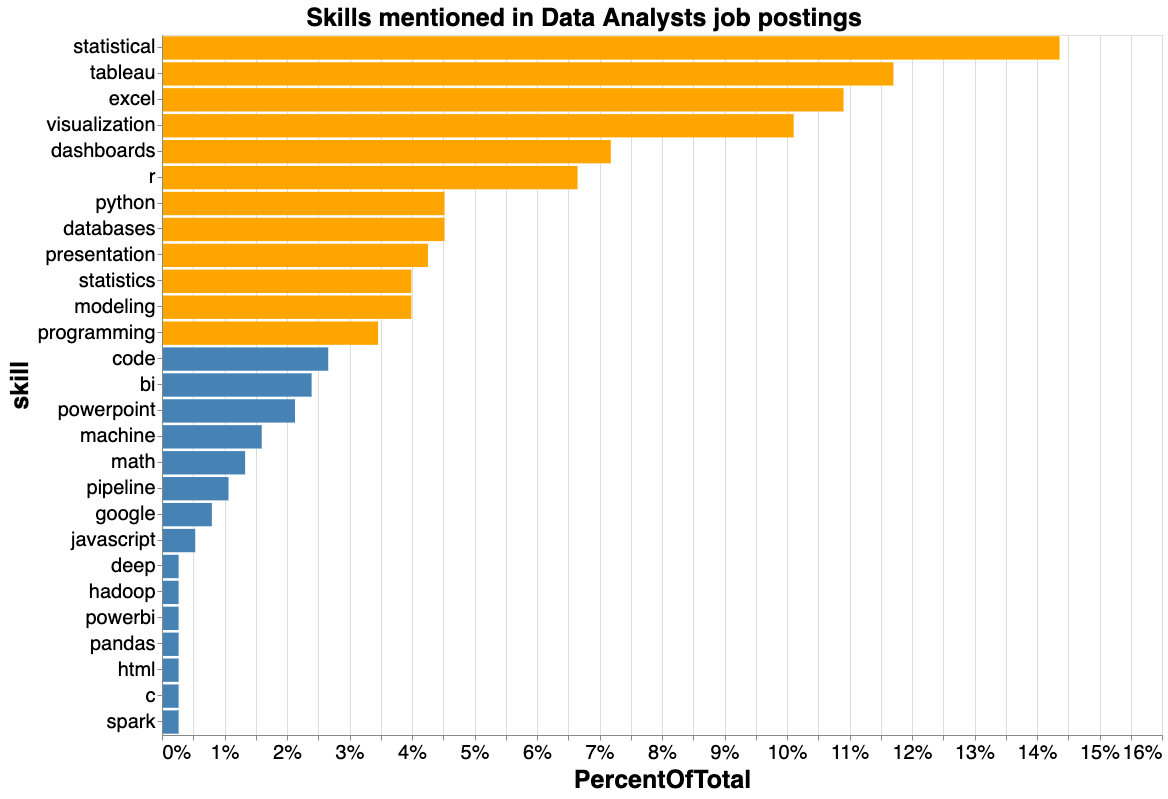

In [18]:
# ensure JavaScript is enable for JupyterLab rendering to work "default"
_=alt.renderers.enable('default')

# create barplot of skills
alt.Chart(skills_da_jobs,        # Data to use
          title = 'Skills mentioned in Data Analysts job postings'
         ).mark_bar().encode(    # set plot type to bar chart
    alt.X('PercentOfTotal:Q', axis=alt.Axis(format='.0%')), # show the percentage of the word in all documents
    y=alt.Y('skill:N',
        sort=alt.EncodingSortField(
            field="counts",      # The field to use for the sort
            op="sum",            # The operation to run on the field prior to sorting
            order="descending"   # The order to sort in
)),    
    color=alt.condition(         # The highlight will be set on the result of a conditional statement
        alt.datum.counts >= 13,  # If the count is over 13 this test returns True,
        alt.value('orange'),     # which sets the bars orange.
        alt.value('steelblue')   # And if it's not true it sets the bar steelblue.
)).configure_axis(
    labelFontSize=20,               # set size of tick labels
    titleFontSize=25).properties(   # Set font size of y-axis 
    width=1000, height = 700).transform_window(   # set figure size
    TotalCounts='sum(counts)',
    frame=[None, None]
).transform_calculate(
    PercentOfTotal="datum.counts / datum.TotalCounts").configure_title(   # set x-axis label size
    fontSize=25, anchor='middle')

<p>Based on the custom list of common skills, statistical knowledge is a must. Having a deep understanding of statics to choose the right methods to analyze data and solve real life problems is key. Among the technical skills, Microsoft Office Excel is the most pervasive, followed by the use of Tableau and Power BI. Communication skills are also very important as shown by the appearance of words such as Tableau, presentation, visualization, and dashboards. Companies hiring data analysts are interested in someone who can use tools that allow them to summarize and communicate results effectively.</p>
<p>Although programming skills made the top ten, coding don't seem to be that relevant as knowing how to use 'one-stop' tools such as Tableau and Excel.</p>

### Looking at context of words

Although machine appeared in less than 2% of the job announcements, I want to see in what context it was used to understand if machine learning was part of some of the job postings.

In [19]:
# since machine is the most used words, I wanted to see in what context it was used

skill_words = Text(word_tokenize(' '.join(DAJobPosts)))
skill_words.concordance('machine')

Displaying 6 of 6 matches:
amiliarity and/or interest in using machine learning packages for predictive mo
the demand planning process ( i.e . machine learning , artificial intelligence 
pplying data mining methodologies ( machine learning , classification , cluster
s using artificial intelligence and machine learning techniques predictive anal
knowledge of predictive analytics , machine learning , data discovery , data st
t management system experience with machine learning , a|b testing , and neural


## Removing 'common' words

After looking at the sets of skills required to get a data analyst job, I was interested in finding the most common words used to describe the 'ideal' candidate.

In [20]:
# remove stop words and punctuation
def rm_words(announcement_string):
    """Return corpora without English stop words, 
    
    unique words of job announcements, and punctuation"""
    
    # typical words in an announcement that don't add value
    UNIQUE_WORDS = ['data', '’', 'qualifications', 'e.g', 'de', '–','tx',"'s",'required','equal', 'year','business',
                    'position','etc', 'and/or','preferred','austin', 'employment','employee', 'experience']
    
    #use stopwords from nltk, punctuation from string and unique words
    custom_stop_words = set(stopwords.words('english')+list(punctuation)+UNIQUE_WORDS)
    
    # get words in announcement without stop words
    words_in_announcement = [word for word in announcement_string if word not in custom_stop_words]
 
    return words_in_announcement

## Top 20 words
<p>Aside from technical skills, what are the most common words used in data related job announcements. The following bar chart shows the frequency of the top 20 most used words.</p>

In [21]:
# get the words in the announcement
words_in_announcement = rm_words(words)
# get the frequency of each word
freq_da = Counter(words_in_announcement)
# create datafrme to visualize top 20 words
requirements = pd.Series(freq_da).sort_values(ascending = False).reset_index().head(20)

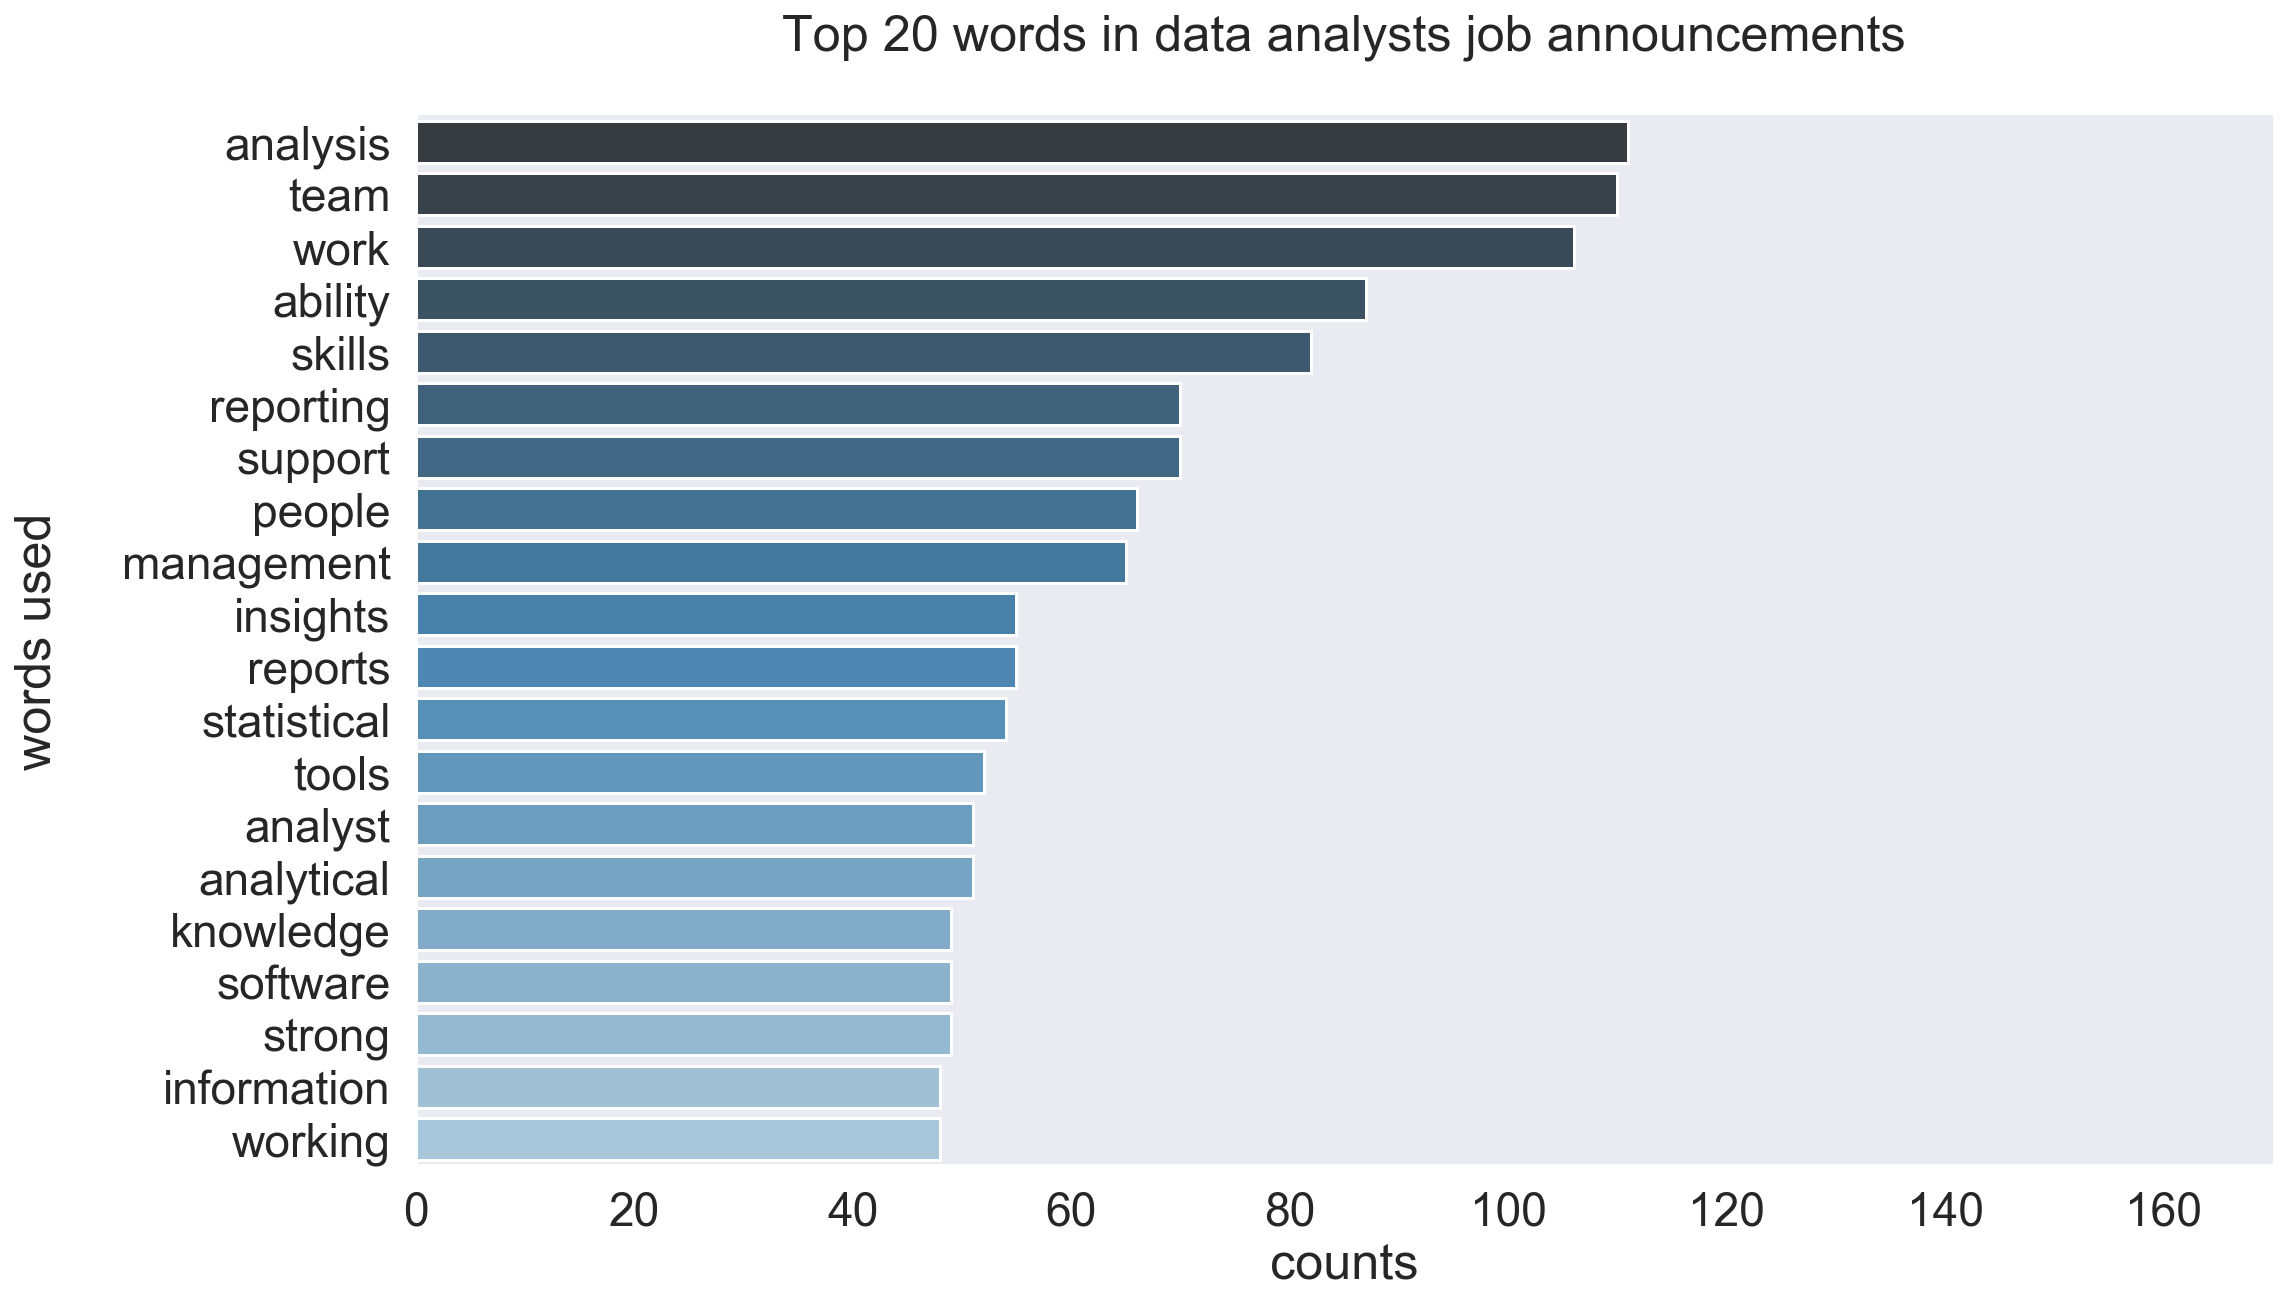

In [22]:
# plot ttop 20 words
_=sns.catplot(y = 'index', x = 0, data = requirements, kind = 'bar', 
              height= 9, aspect=1.8, palette='Blues_d', dodge = False)
_=plt.xlim(0,170)
_=plt.title('Top 20 words in data analysts job announcements\n')
_=plt.xlabel('counts')
_=plt.ylabel('words used\n')

<p>Experience is without a doubt the most sought-after attribute in applicants along with the ability to work in teams and analyze business problems. In general, companies looking for data analysts who can not just use tools, but provide support to management and stakeholders.</p>

### Contextualize words in the ad

Aside from experience, business is very relevant. Looking at the context of the word, we can see that companies want team member who are able to identify, analyze and provide ways to solve real business problems.

In [23]:
Text(word_tokenize(' '.join(words_in_announcement))).concordance('business')

no matches


### Visualizing most prominent terms

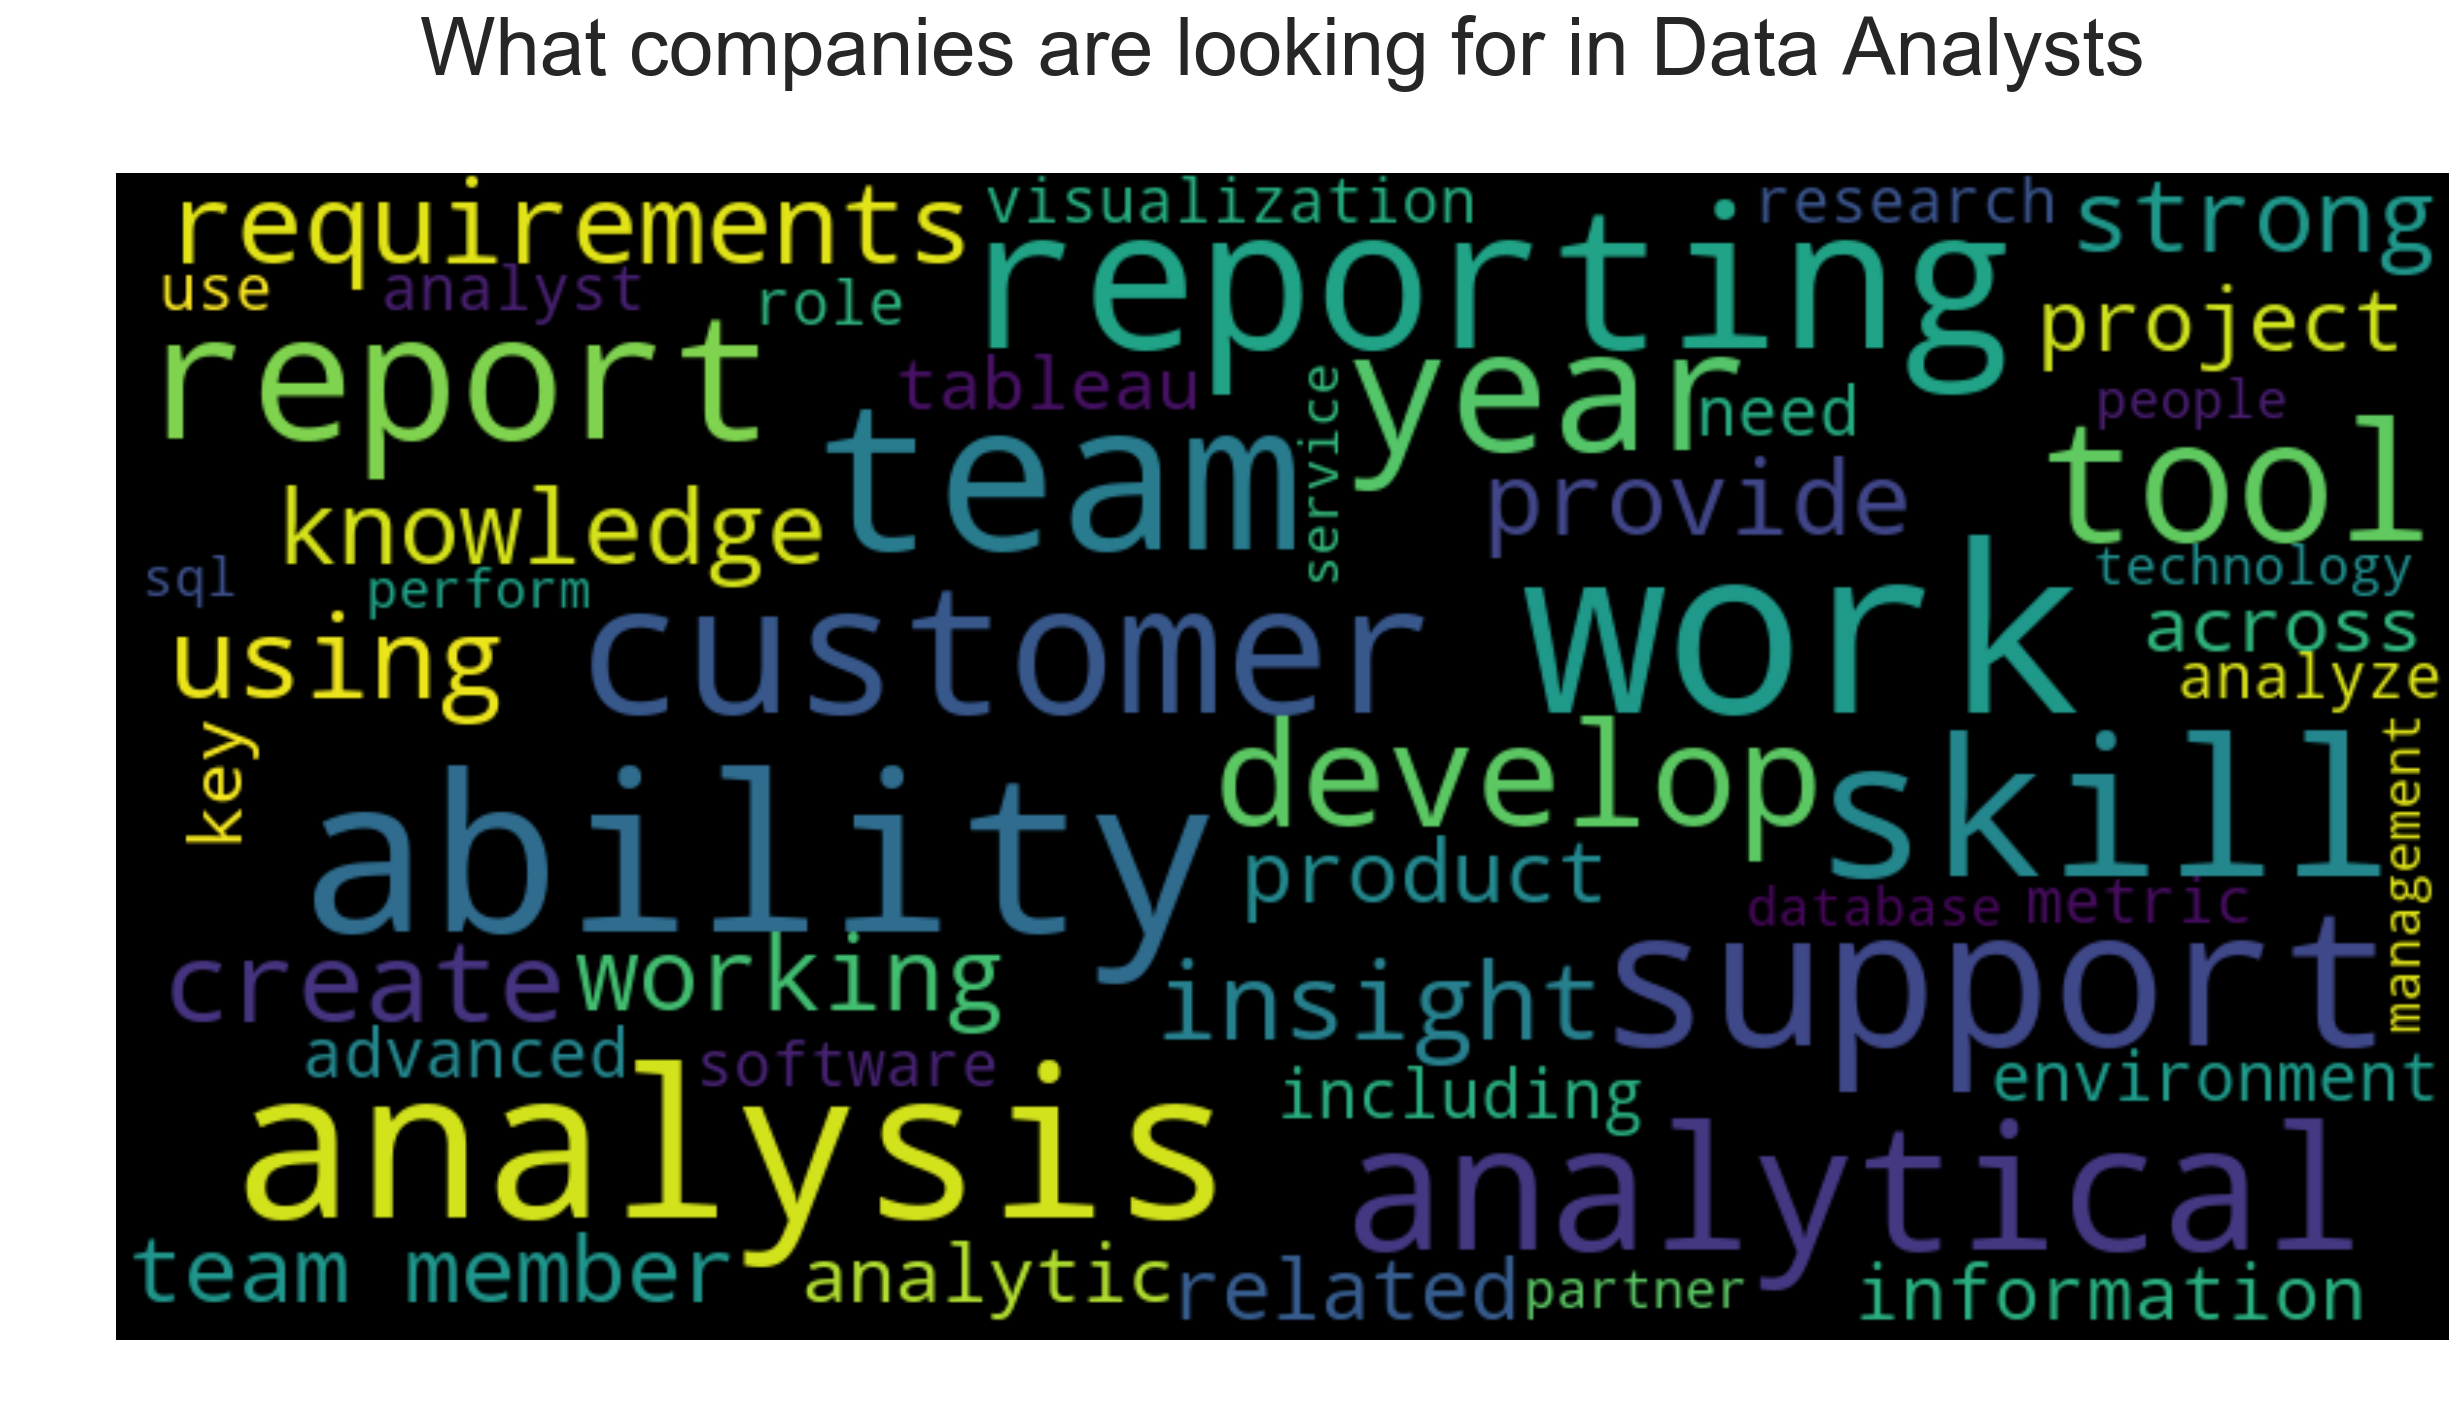

In [24]:
word_cloud = WordCloud(max_font_size=80, max_words=50,width=800,height=400).generate(' '.join(words_in_announcement))

_=plt.figure( figsize=(20,10) )          # set the figure size
_=plt.imshow(word_cloud,                 # show the words
             interpolation='bilinear')
_=plt.axis("off")                        # remove axis labels
_=plt.title('What companies are looking for in Data Analysts\n', fontdict={'fontsize':40, 'fontweight':400})
%config InlineBackend.figure_format = 'retina'

***
# Data Scientist job announcements

There were 400 job postings for data scientists in Austin in March 2019. The following section analyzes roughly 40 of those announcements.

## Obtain the data

In [25]:
# list of search results for data analysts jobs
DS_jobs = 'https://www.indeed.com/jobs?q=data+scientist&l=Austin%2C+TX'
DS_jobs2= 'https://www.indeed.com/jobs?q=data+scientist&l=Austin%2C+TX&start=10'
DS_jobs3= 'https://www.indeed.com/jobs?q=data+scientist&l=Austin%2C+TX&start=20'
DS_jobs4= 'https://www.indeed.com/jobs?q=data+scientist&l=Austin%2C+TX&start=30'

In [26]:
%time
# create a list witht job announcement result pages 
ds_all_jobs_list = [DS_jobs,DS_jobs2, DS_jobs3, DS_jobs4]
# get all the links in a single list
ds_links = [l for y in [get_all_vacancies(i) for i in ds_all_jobs_list] for l in y]

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs


In [27]:
print('The list of results contains %d data scientists job postings.'%(len(ds_links)))

The list of results contains 40 data scientists job postings.


## Read description texts into a list

In [28]:
descriptions = []
for i in ds_links:
    descriptions+=read_description(i)

In [29]:
# write corpora to a text file for further use
with open('DS_links.txt', 'wb') as DS_links:
    pickle.dump(descriptions, DS_links)

In [30]:
# read file
with open('./Data-Science-Projects/reading-job-announcements/DS_links.txt', 'rb') as DS_links:
    descriptions = pickle.load(DS_links)

## Announcements corpora

In [31]:
# get the words from the announcements
DS_words =get_words(descriptions)

# get skills from DS job announcements
ds_jobs = [s for s in DS_words if s in SKILLS]

In [32]:
# create pandas data frame with skills
skills_ds_jobs=pd.Series(Counter(ds_jobs)).sort_values(
    ascending = False).reset_index().rename(
    index=str,columns={"index": "skill", 0: "counts"})

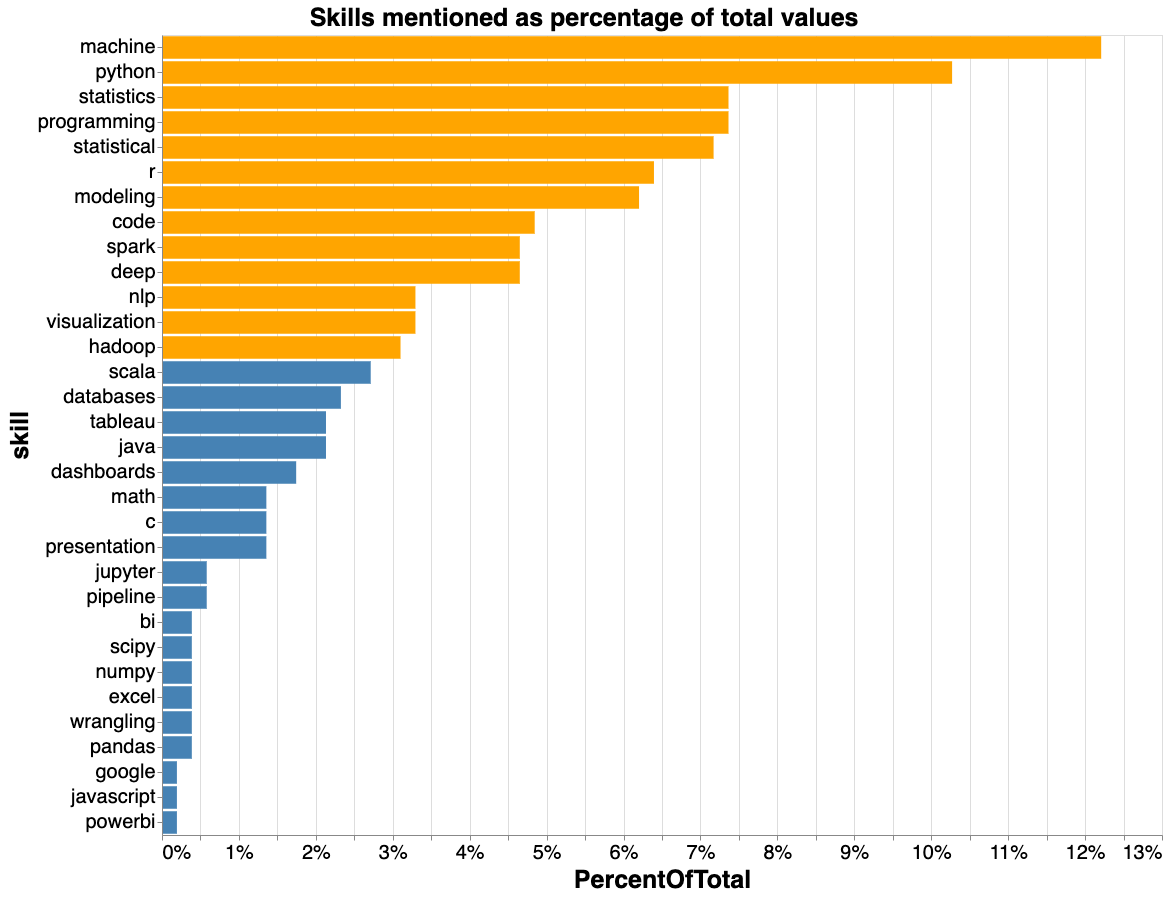

In [33]:
_=alt.renderers.enable('default')

# create a bar plot of skills in the announcements
alt.Chart(skills_ds_jobs,
          title = 'Skills mentioned as percentage of total values'
         ).mark_bar().encode(
    alt.X('PercentOfTotal:Q', axis=alt.Axis(format='.0%')),
    y=alt.Y('skill:N',
        sort=alt.EncodingSortField(
            field="counts",       # The field to use for the sort
            op="sum",            # The operation to run on the field prior to sorting
            order="descending"   # The order to sort in
)),   
    color=alt.condition(         # The highlight will be set on the result of a conditional statement
        alt.datum.counts >= 15,  # If the count is over 14 this test returns True,
        alt.value('orange'),     # which sets the bars orange.
        alt.value('steelblue')   # And if it's not true it sets the bar steelblue.
)).configure_axis(
    labelFontSize=20,
    titleFontSize=25).properties(
    width=1000, height = 800).transform_window(
    TotalCounts='sum(counts)',
    frame=[None, None]
).transform_calculate(
    PercentOfTotal="datum.counts / datum.TotalCounts").configure_title(fontSize=25, anchor='middle')

<p>While Microsoft office Excel is the second most important skill for data analysts jobs, it is mentioned in less than 1% of the announcements for data scientists. Python programming, machine learning and statistics are the most sought-after skills in data scientist jobs. Data scientists jobs seem to prefer less knowledge of out of the box tools, preferring instead more customizable approaches to problem solving via programming skills. That is not to say that tools such as Tableau are not necessary, as a visualization and analysis tool, since Tableau can be very customizable and it's increasingly easy to integrate with R and Python. In general, companies hiring data scientists are interested in someone who can not only code, but gather, integrate, analyze and know how to choose the right algorithm to model data. </p>


<p>Hence, companies hiring data analysts are looking for someone who can tell a story of what has happened and how to fix or improve it using primarily out of the box tools, companies hiring data scientists want someone who can not only find trends and tell stories with data, but it's able to use machine and deep learning to predict what will happen.</p>


In [34]:
# since machine is the most used words, I wanted to see in what context it was used
speech_words = Text(word_tokenize(' '.join(descriptions)))
speech_words.concordance('machine')

Displaying 25 of 63 matches:
the demand planning process ( i.e . machine learning , artificial intelligence 
pplying data mining methodologies ( machine learning , classification , cluster
s using artificial intelligence and machine learning techniques predictive anal
knowledge of predictive analytics , machine learning , data discovery , data st
se in big data , data analytics and machine learning to help shape ecologically
ll focus on modern data analytics , machine learning , and industrial applicati
lytics ( especially data mining and machine learning ) and the application of s
perience implementing and deploying machine learning solutions a plus the home 
ext construct and fit statistical , machine learning , or optimization models p
any-wide impact apply best-in-class machine learning techniques to solve the bu
at hand produce novel insights with machine learning to inform company strategy
aster 's or phd in data analytics , machine learning , statistics , or related 
eds . the t

**
<p>There were over 60 mentions of machine learning in the data scientist announcements. This confirms that companies are looking for team members with hands-on experience in machine learning.</p>

## Top 20 words in data scientists job announcements

In [35]:
# get the most used words in the announcement
words_in_announcement_DS = rm_words(DS_words)

#frequency of words
freq_DS = Counter(words_in_announcement_DS)

In [36]:
DS_requirements = pd.Series(freq_DS).sort_values(ascending= False).reset_index().head(20)

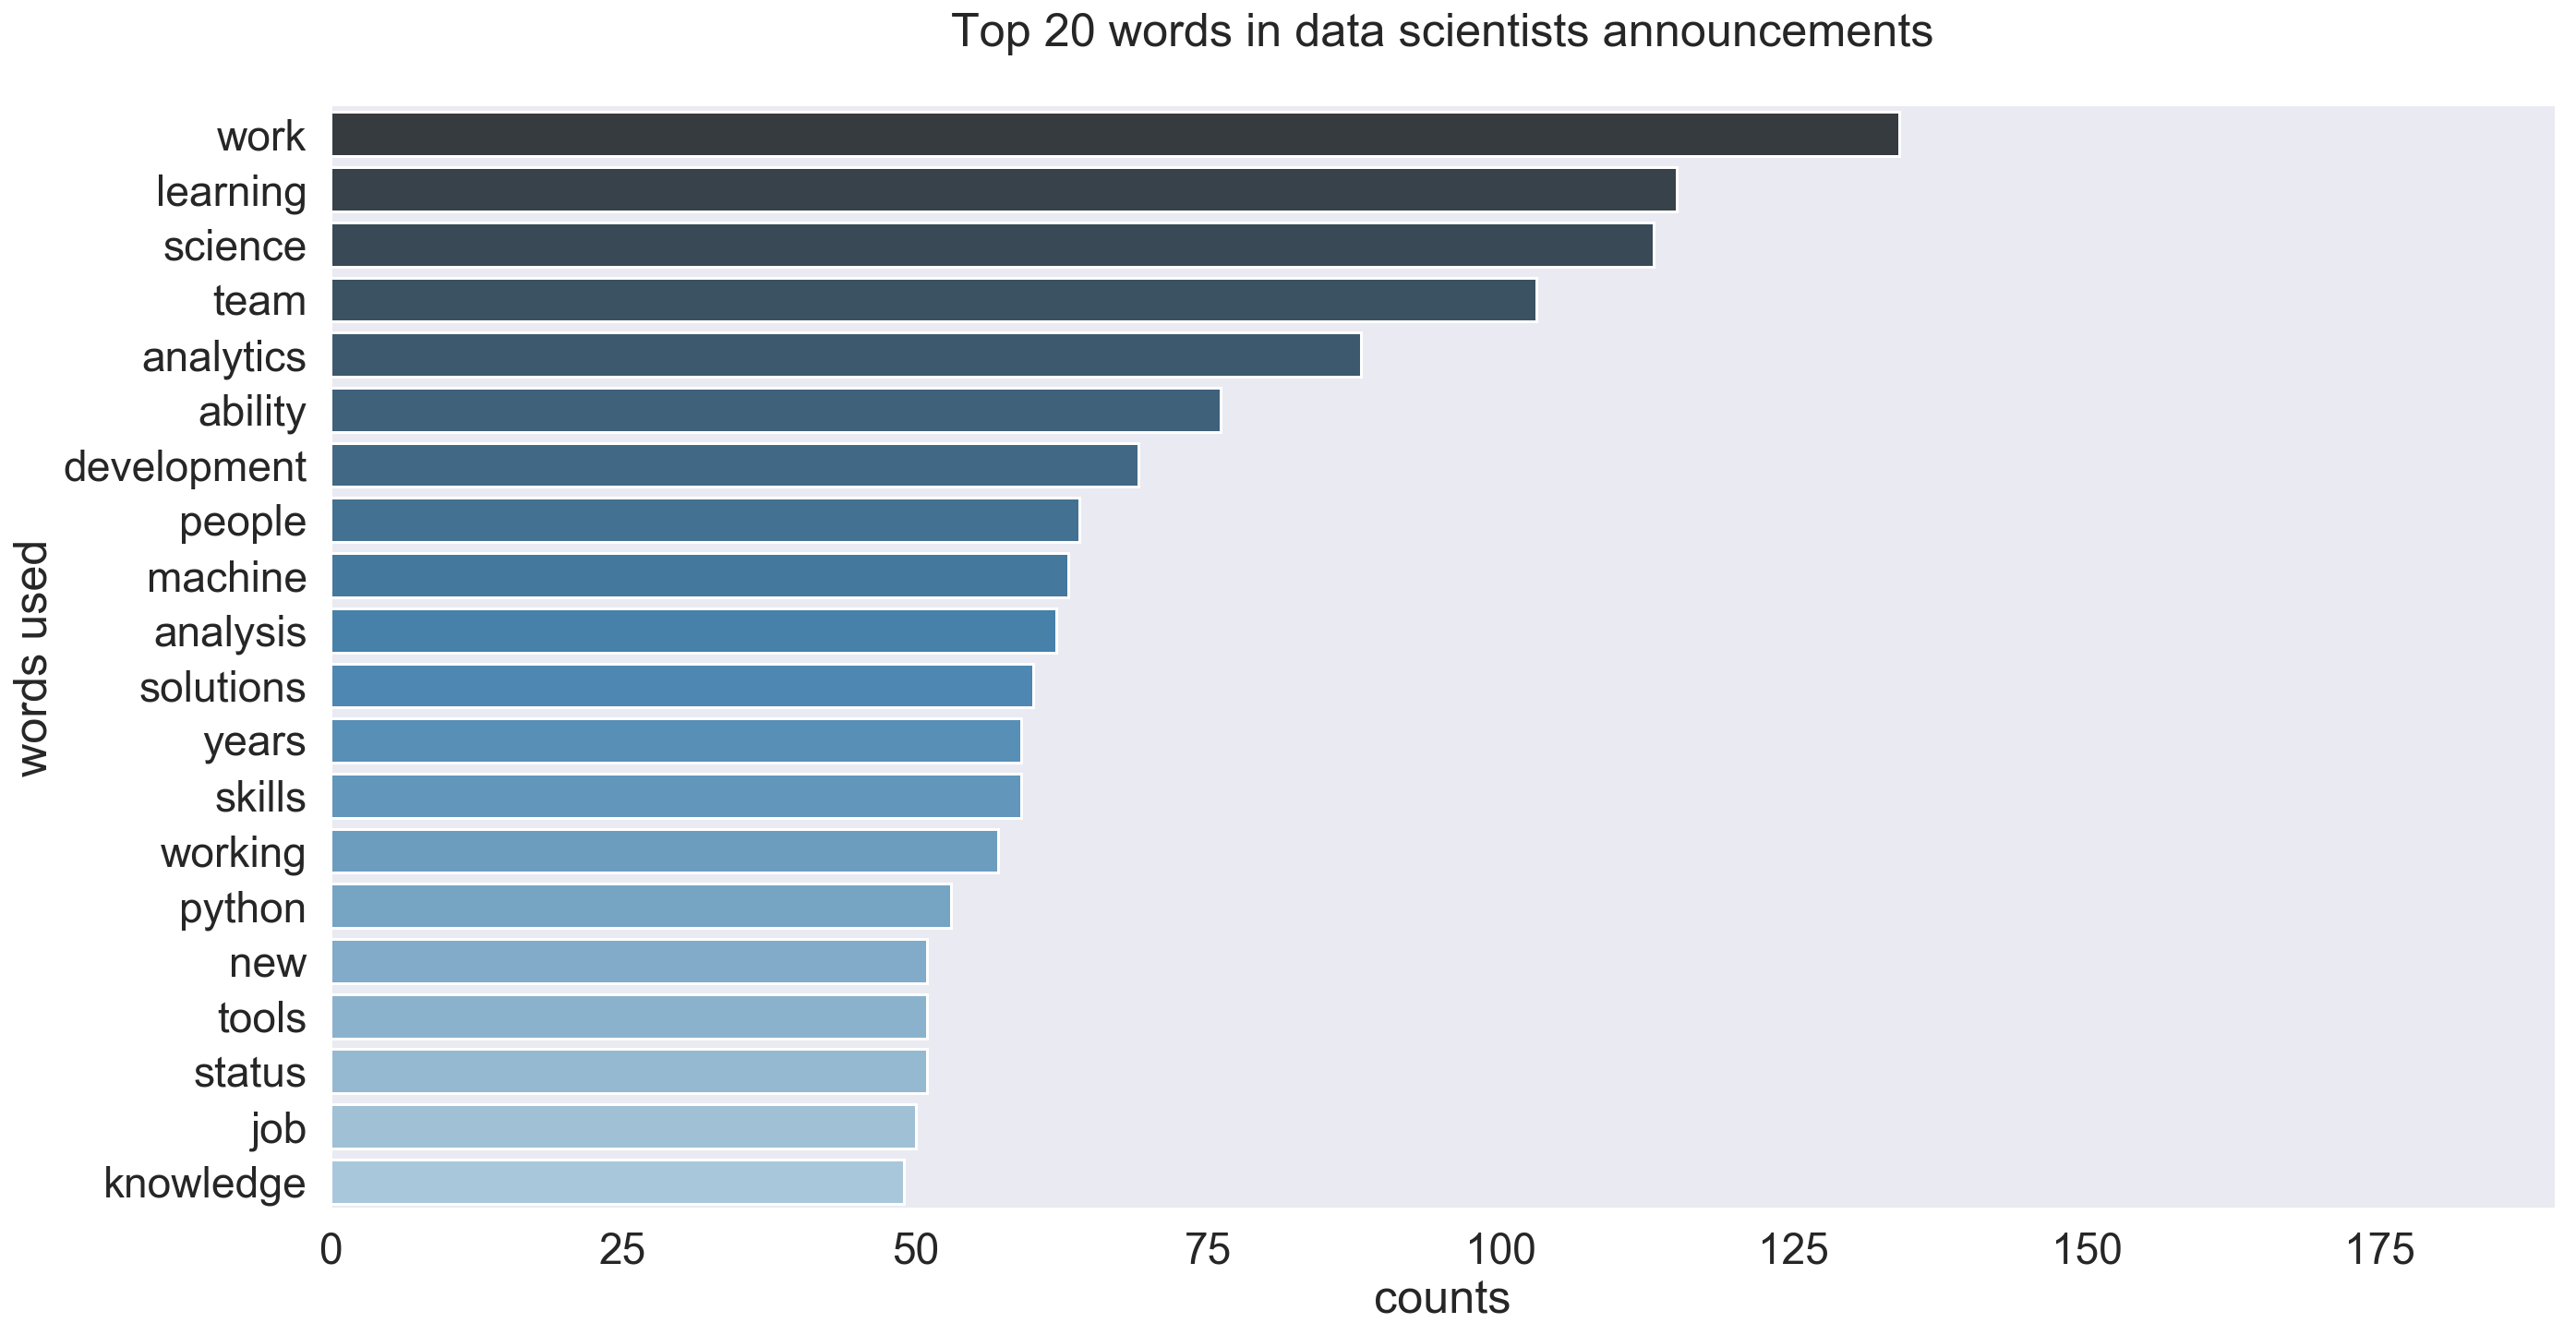

In [37]:
# plot top 20 used words
_=sns.catplot(y = 'index', x = 0, data = DS_requirements, kind = 'bar',
             height= 10, aspect=2, palette='Blues_d', dodge = False)
_=plt.xlim(0,190)
_=plt.title('Top 20 words in data scientists announcements\n')
_=plt.xlabel('counts')
_=plt.ylabel('words used')

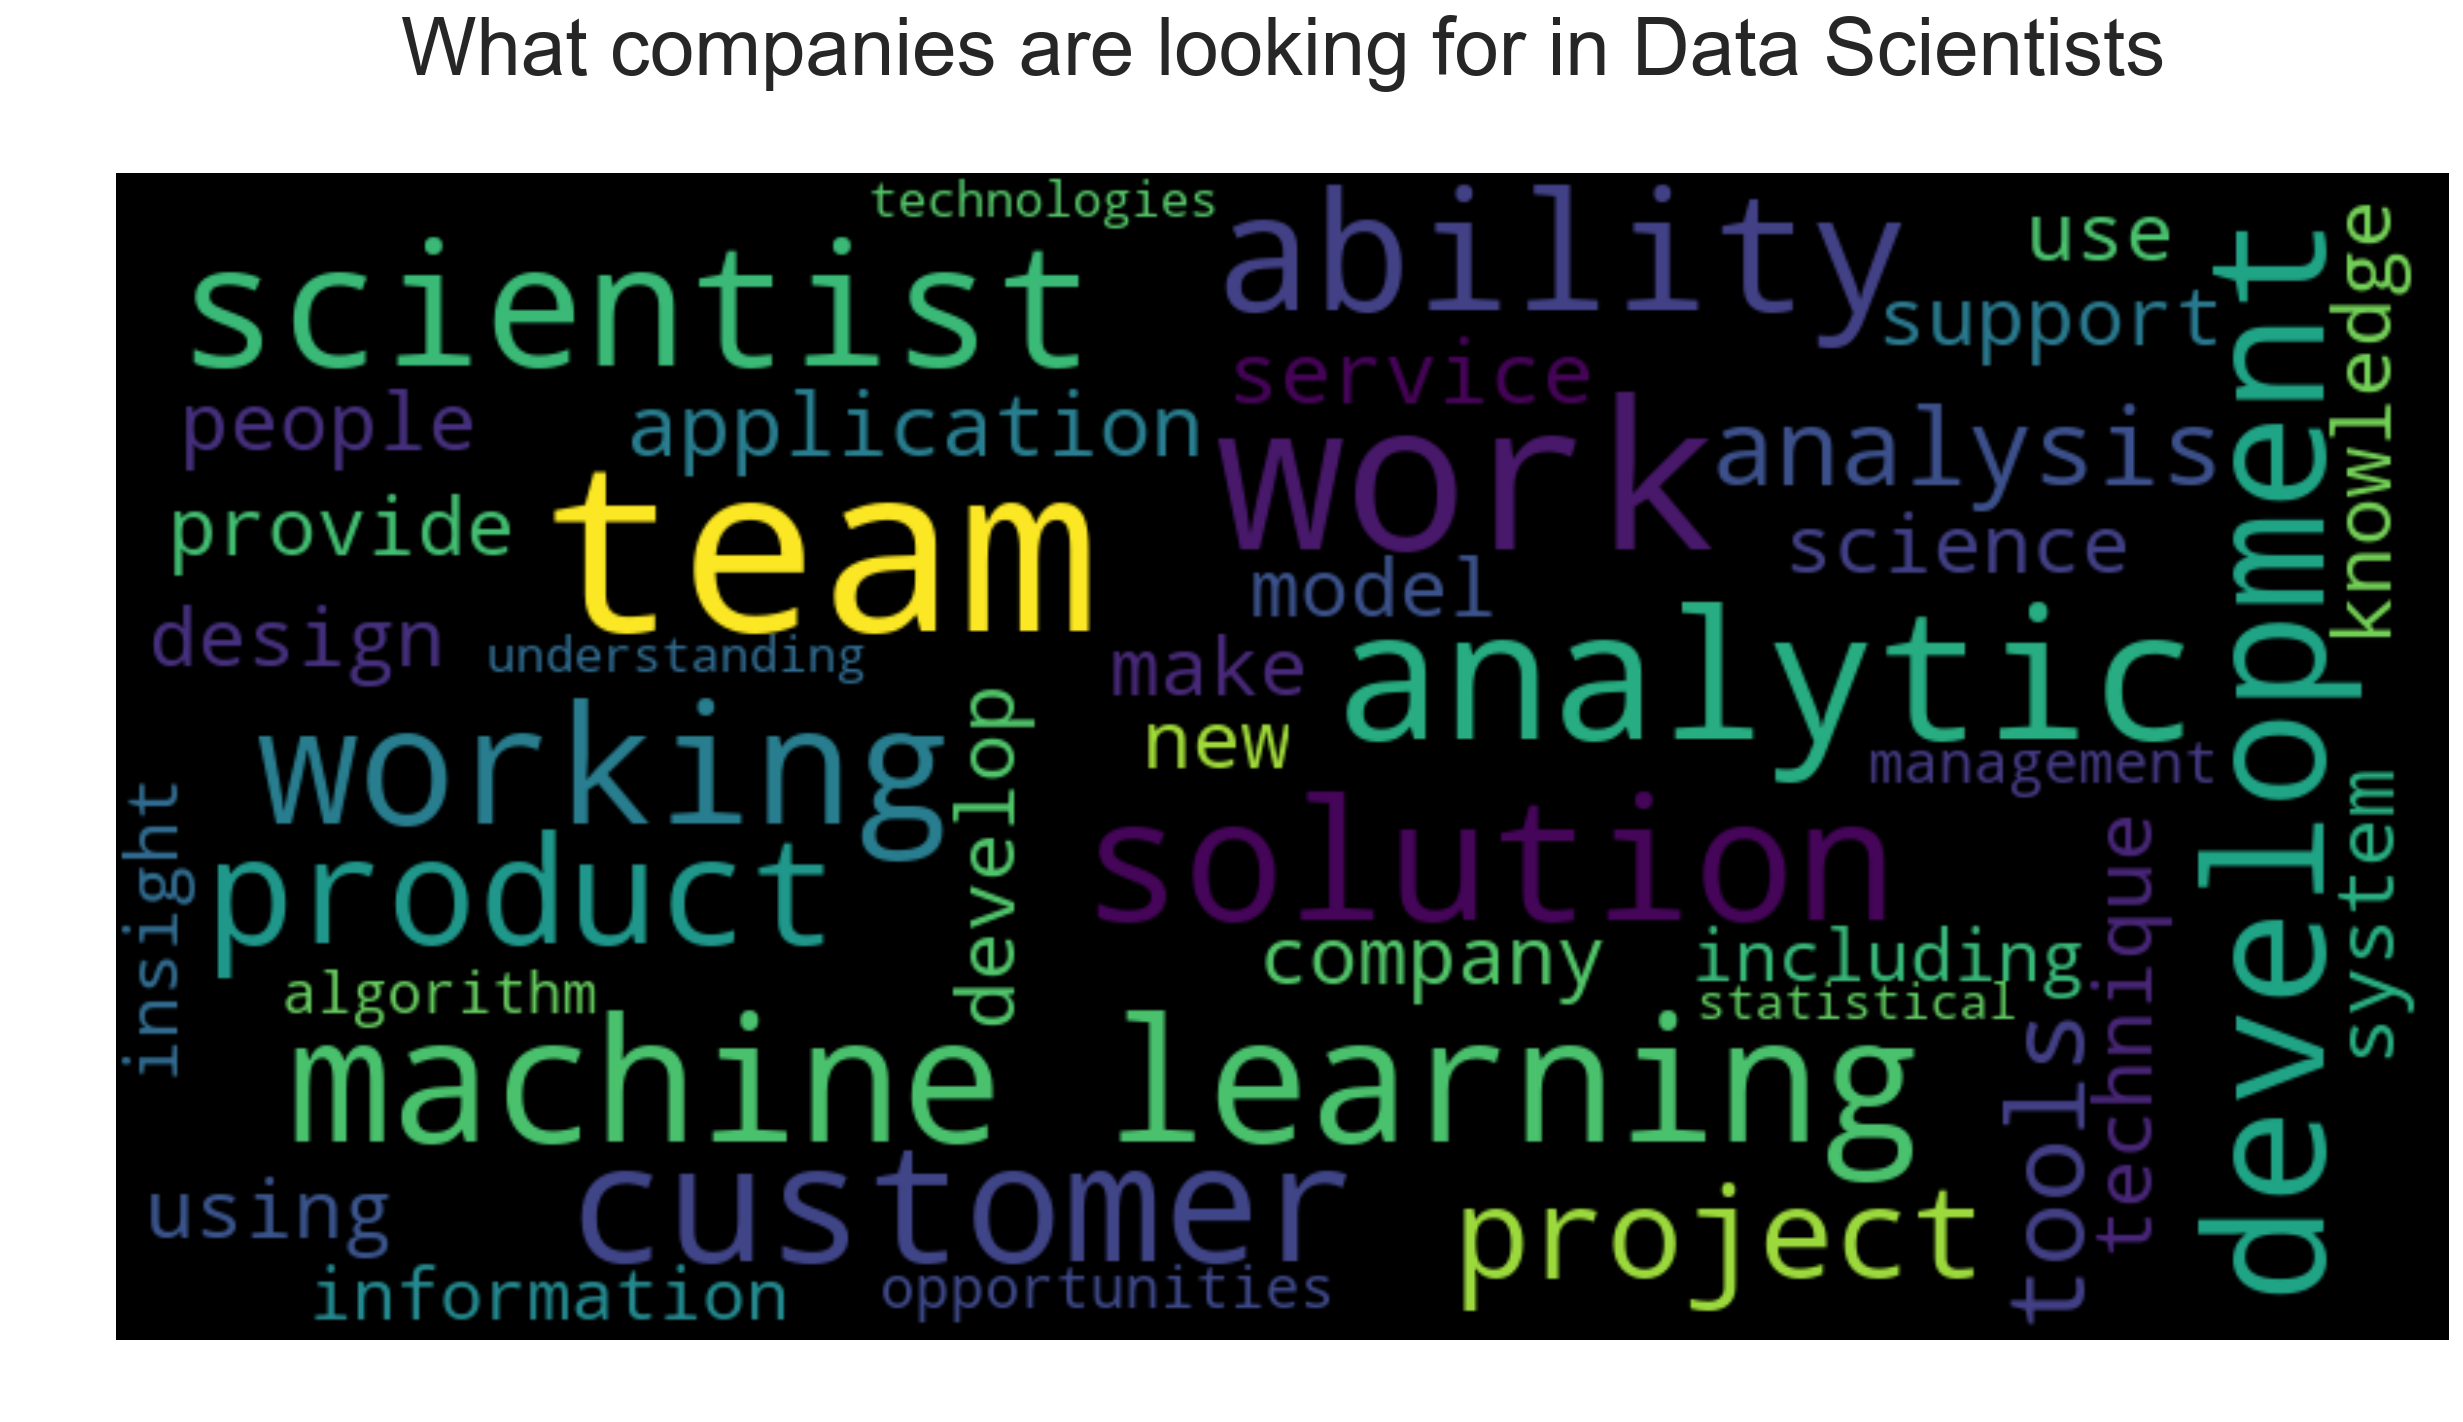

In [38]:
# 'double resolution plot output for Retina screens'
word_cloud = WordCloud(max_font_size=80,
                       max_words=40,
                       width=800,height=400).generate(' '.join(words_in_announcement_DS))

# set parameters
_=plt.figure( figsize=(20,10) )
_=plt.imshow(word_cloud, interpolation='bilinear')
_=plt.axis("off")
_=plt.title('What companies are looking for in Data Scientists\n', fontdict={'fontsize':40, 'fontweight':400})
%config InlineBackend.figure_format = 'retina'

# Comparing Data Analysts and Data Scientists job announcements

In [39]:
# merge all announcements
DA_jobAnnouncements = pd.Series(freq_da).sort_values(ascending = False).reset_index().rename(index=str,columns={"index": "word_used", 0: "counts"})
DS_jobAnnouncements = pd.Series(freq_DS).sort_values(ascending = False).reset_index().rename(index=str,columns={"index": "word_used", 0: "counts"})

# add extra column to identify origin
DA_jobAnnouncements['announcement'] = 'da'
DS_jobAnnouncements['announcement'] = 'ds'

# merge datasets
all_announcements = pd.merge(DA_jobAnnouncements, DS_jobAnnouncements, on = ['announcement','word_used','counts'], how = 'outer').fillna(0)

In [40]:
print('\n\nThere are %d words from the data analysts job postings and %d from the data scientists job announcements. \n\
The merge data set with all the postings contains %d words.'%(DA_jobAnnouncements.shape[0],DA_jobAnnouncements.shape[0], all_announcements.shape[0]))



There are 2783 words from the data analysts job postings and 2783 from the data scientists job announcements. 
The merge data set with all the postings contains 6115 words.


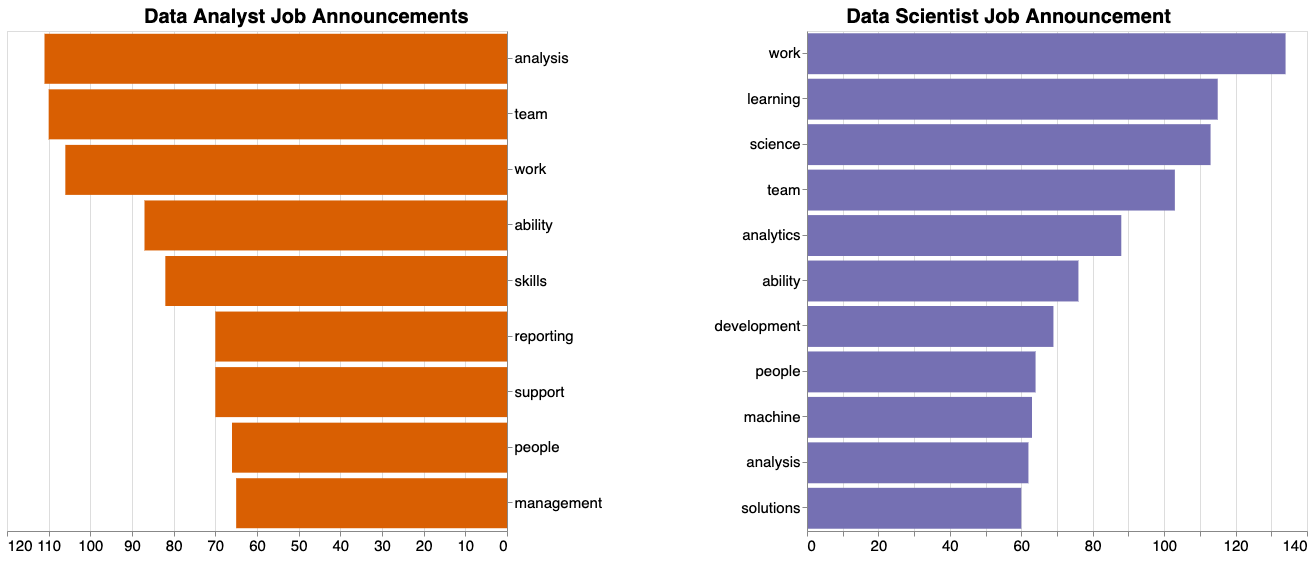

In [41]:
# set the merged dataset as the data source
source = all_announcements.sort_values('counts', ascending = False).head(500)

# initialize the bar charts in a single figure
base = alt.Chart(source.head(20))

# set the color based on the whether the data comes from data analyst (da) set of the data scientist (ds) set
color_scale = alt.Scale(domain=['da', 'ds'],
                        range=['#d95f02', '#7570b3']) #range=['#1f77b4', '#e377c2']

# set the parameters of the left bar plot
left = base.transform_filter(                                   
    alt.datum.announcement == 'da'                                  # Use condition to use da data
).encode(
    y=alt.Y('word_used:O', sort=alt.EncodingSortField(              # Set the y-axis values to the frequency of words
        field='counts', op = 'sum', order = 'descending'),          # Sort counts in descending order
            axis = alt.Axis(orient = 'right')),                     # set y-axis label to the right
    x=alt.X('counts:Q',
    sort='descending'),
    color=alt.Color('announcement:N', 
                    scale=color_scale, legend=None)
).mark_bar().properties(title='Data Analyst Job Announcements',
                        width=500, height = 500)


right = base.transform_filter(
    alt.datum.announcement == 'ds'
).encode(
    y=alt.Y('word_used:O', sort=alt.EncodingSortField(
        field='counts', op = 'sum', order = 'descending')),
    x=alt.X('counts:Q', title='counts'),
    color=alt.Color('announcement:N', 
                    scale=color_scale, legend=None)
).mark_bar().properties(title='Data Scientist Job Announcement',width=500, height = 500)

# set titles and axis formatting
alt.HConcatChart(hconcat=[left,right], spacing = 100, center=True).configure_axis(
    labelFontSize=15,
    titleFontSize=0).configure_title(fontSize=20, anchor='middle').configure_bar(align = 'left')

A side by side comparison of the words in the announcements shows that most of the attributes overlap, with experience being at the top of both lists. 

# Interactive Comparison
The following graph allows to use a slider to visualize the word count distribution by announcement.

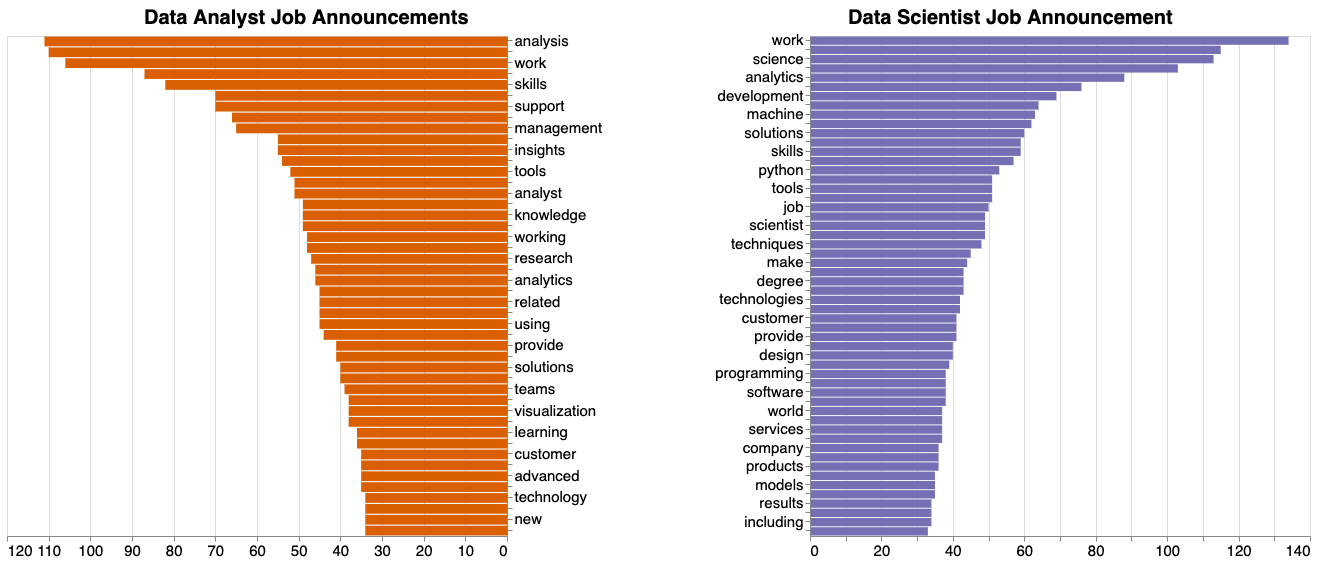

In [42]:

source1 = all_announcements.sort_values('counts', ascending = False).head(100)

slider = alt.binding_range(min=20, max=182, step=1)
select_counts = alt.selection_single(name='word', fields=['counts'], bind=slider)

base = alt.Chart(source1).add_selection(
    select_counts
).transform_filter(
    select_counts
).transform_calculate(
    announcement=alt.expr.if_(alt.datum.announcement == 'ds', 'ds', 'da')
)

color_scale = alt.Scale(domain=['da', 'ds'],
                        range=['#d95f02', '#7570b3'])

left = base.transform_filter(
    alt.datum.announcement == 'da'
).encode(
    y=alt.Y('word_used:O', sort=alt.EncodingSortField(field='counts', op = 'sum', order = 'descending'),axis = alt.Axis(orient = 'right')),
    x=alt.X('counts:Q',
    sort='descending'),
    color=alt.Color('announcement:N', scale=color_scale, legend=None)
).mark_bar().properties(title='Data Analyst Job Announcements',width=500, height = 500)


right = base.transform_filter(
    alt.datum.announcement == 'ds'
).encode(
    y=alt.Y('word_used:O', sort=alt.EncodingSortField(field='counts', op = 'sum', order = 'descending')),
    x=alt.X('counts:Q', title='counts'),
    color=alt.Color('announcement:N', scale=color_scale, legend=None)
).mark_bar().properties(title='Data Scientist Job Announcement',width=500, height = 500)

alt.HConcatChart(hconcat=[left,right], spacing = 100, center=True).configure_axis(
    labelFontSize=15,
    titleFontSize=0).configure_title(fontSize=20, anchor='middle').configure_bar(align = 'left')

alt.HConcatChart.savechart(comparison,'interactive_comparison.html')

*** 

# Data Visualization Analyst

In [43]:
dv = ['https://www.indeed.com/jobs?q=data+visualization&l=Austin%2C+TX',
     'https://www.indeed.com/jobs?q=data+visualization&l=Austin%2C+TX&start=10',
     'https://www.indeed.com/jobs?q=data+visualization&l=Austin%2C+TX&start=20',
     'https://www.indeed.com/jobs?q=data+visualization&l=Austin%2C+TX&start=30']

dv_vacancies = [d for l in [get_all_vacancies(i) for i in dv] for d in l]

In [44]:
%time
# get a list of all the job announcements, get the descriptions and add them to a list
dv_list = []

for i in dv_vacancies:
    dv_list+=read_description(i)
    
# save descriptions
with open('DVJobPosts.txt', 'wb') as dv_links:
    pickle.dump(dv_list, dv_links)
    

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 5.72 µs


In [45]:
# open descriptions
with open('./Data-Science-Projects/reading-job-announcements/DVJobPosts.txt', 'rb') as dv_links:
    dv_list = pickle.load(dv_links)

In [46]:
# get words
dv_words = get_words(dv_list)

# find the skills in the announcement
skills_dv = [x for x in dv_words if x in SKILLS]

skills_dv_jobs=pd.Series(Counter(skills_dv)).sort_values(
    ascending = False).reset_index().rename(
    index=str,columns={"index": "skill", 0: "counts"})

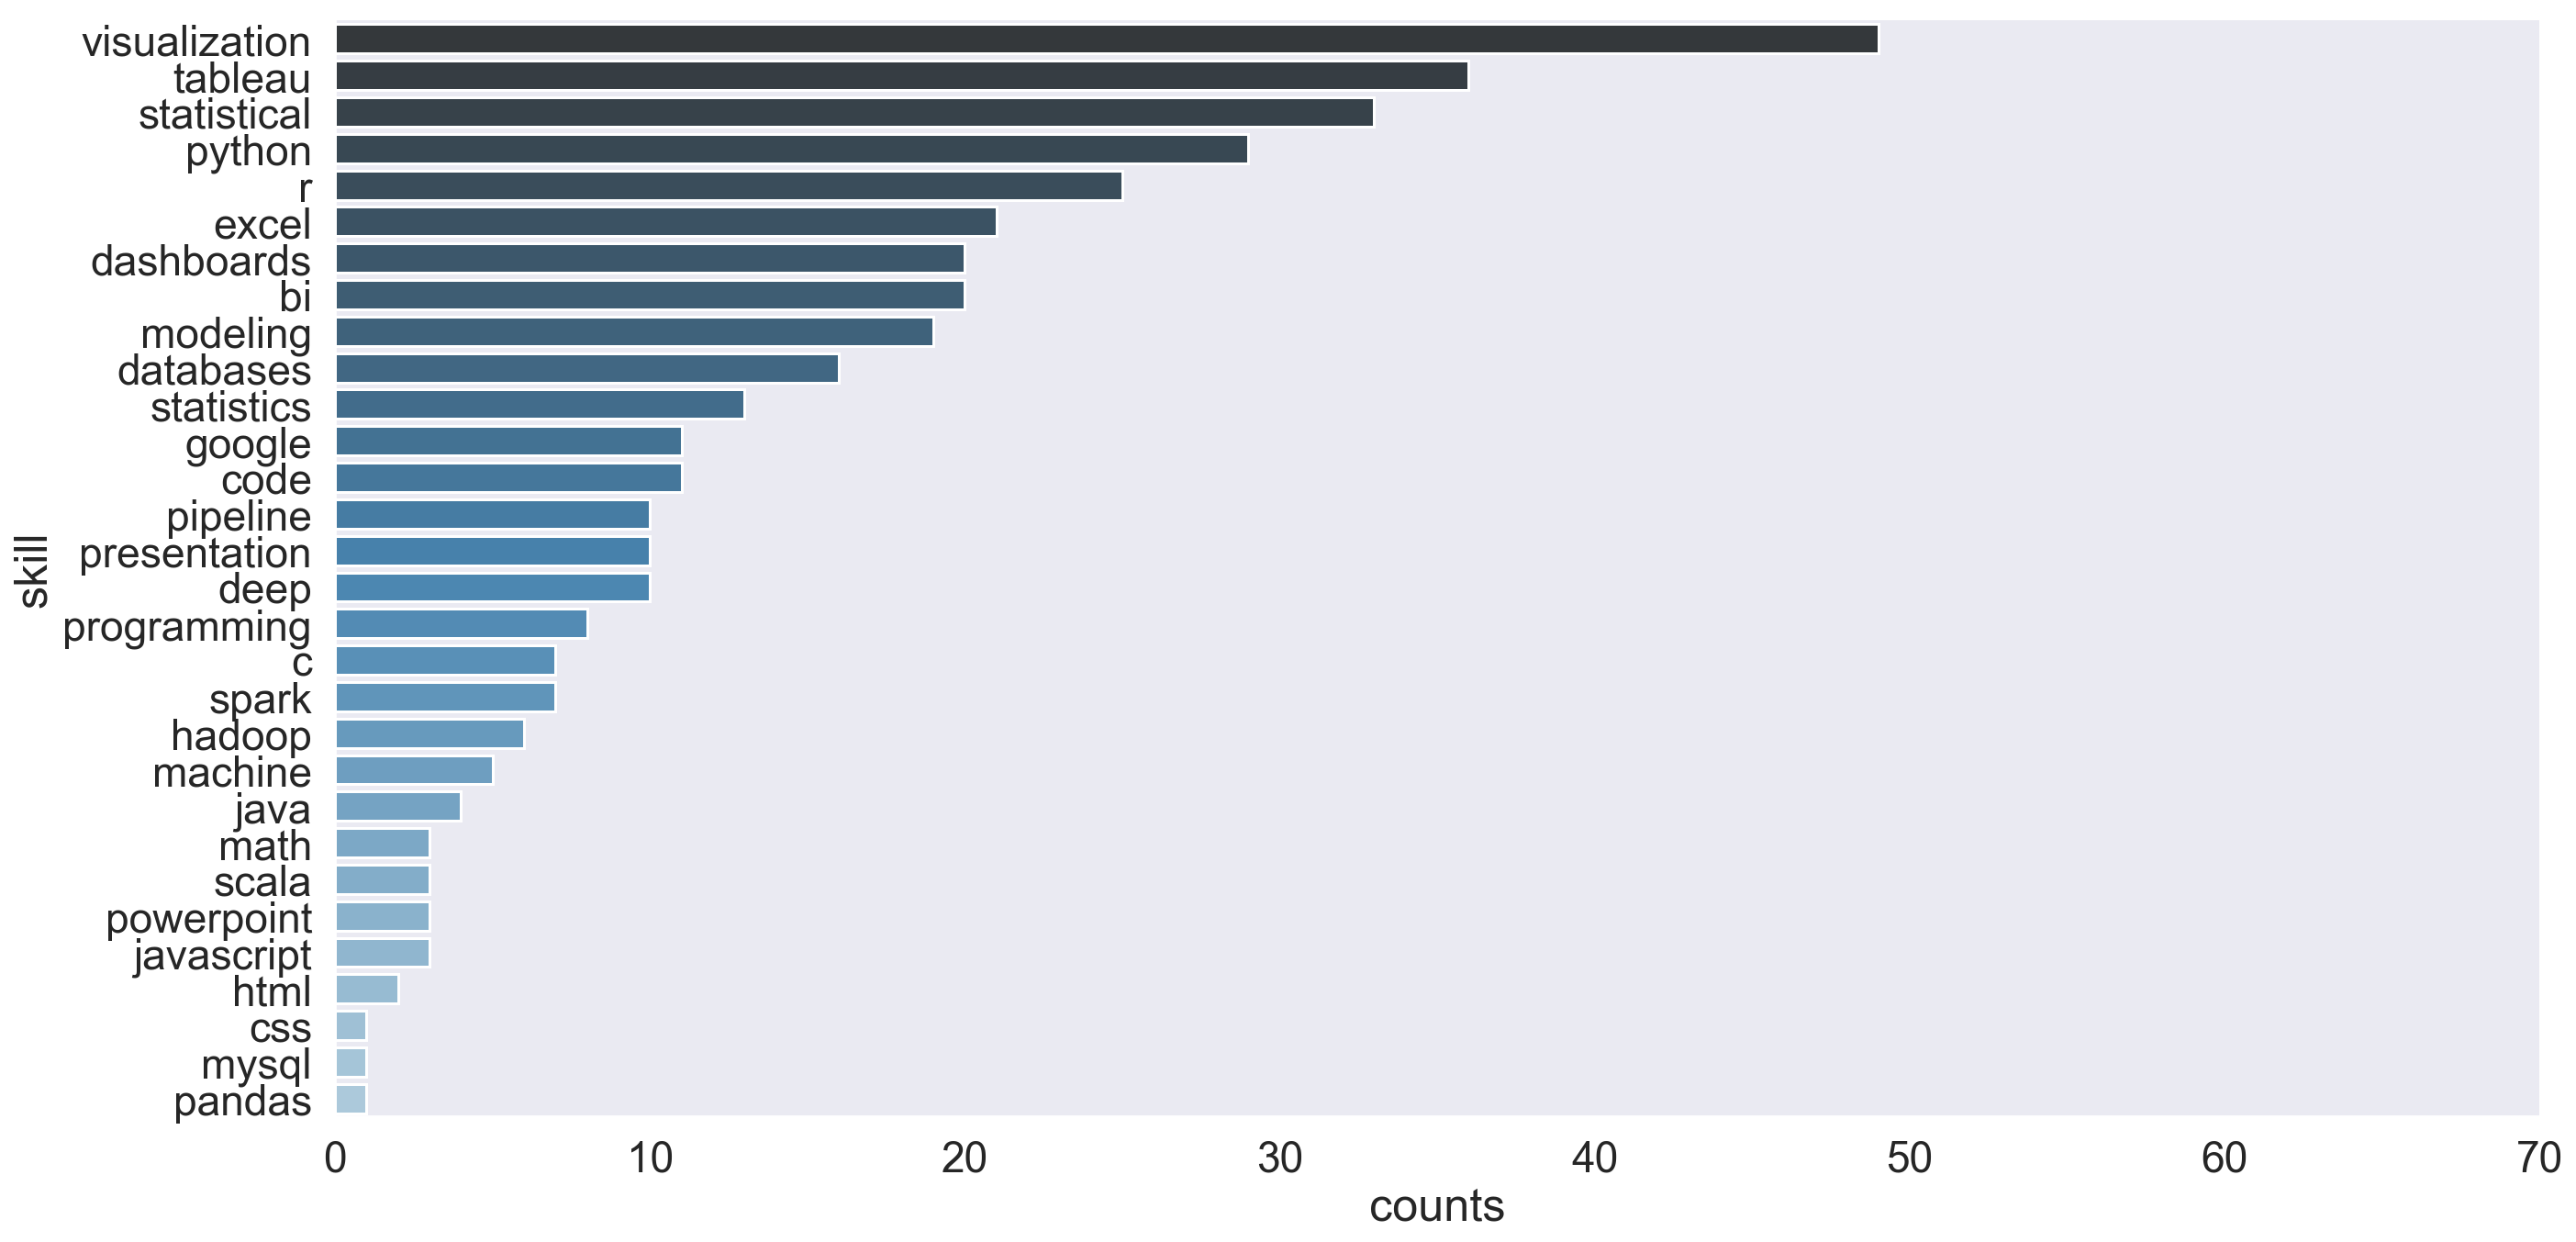

In [47]:
_=sns.catplot( x = 'counts', y='skill', data = skills_dv_jobs, kind = 'bar',
             height= 10, aspect=2, palette='Blues_d', dodge = False)
_=plt.xlim(0,70)

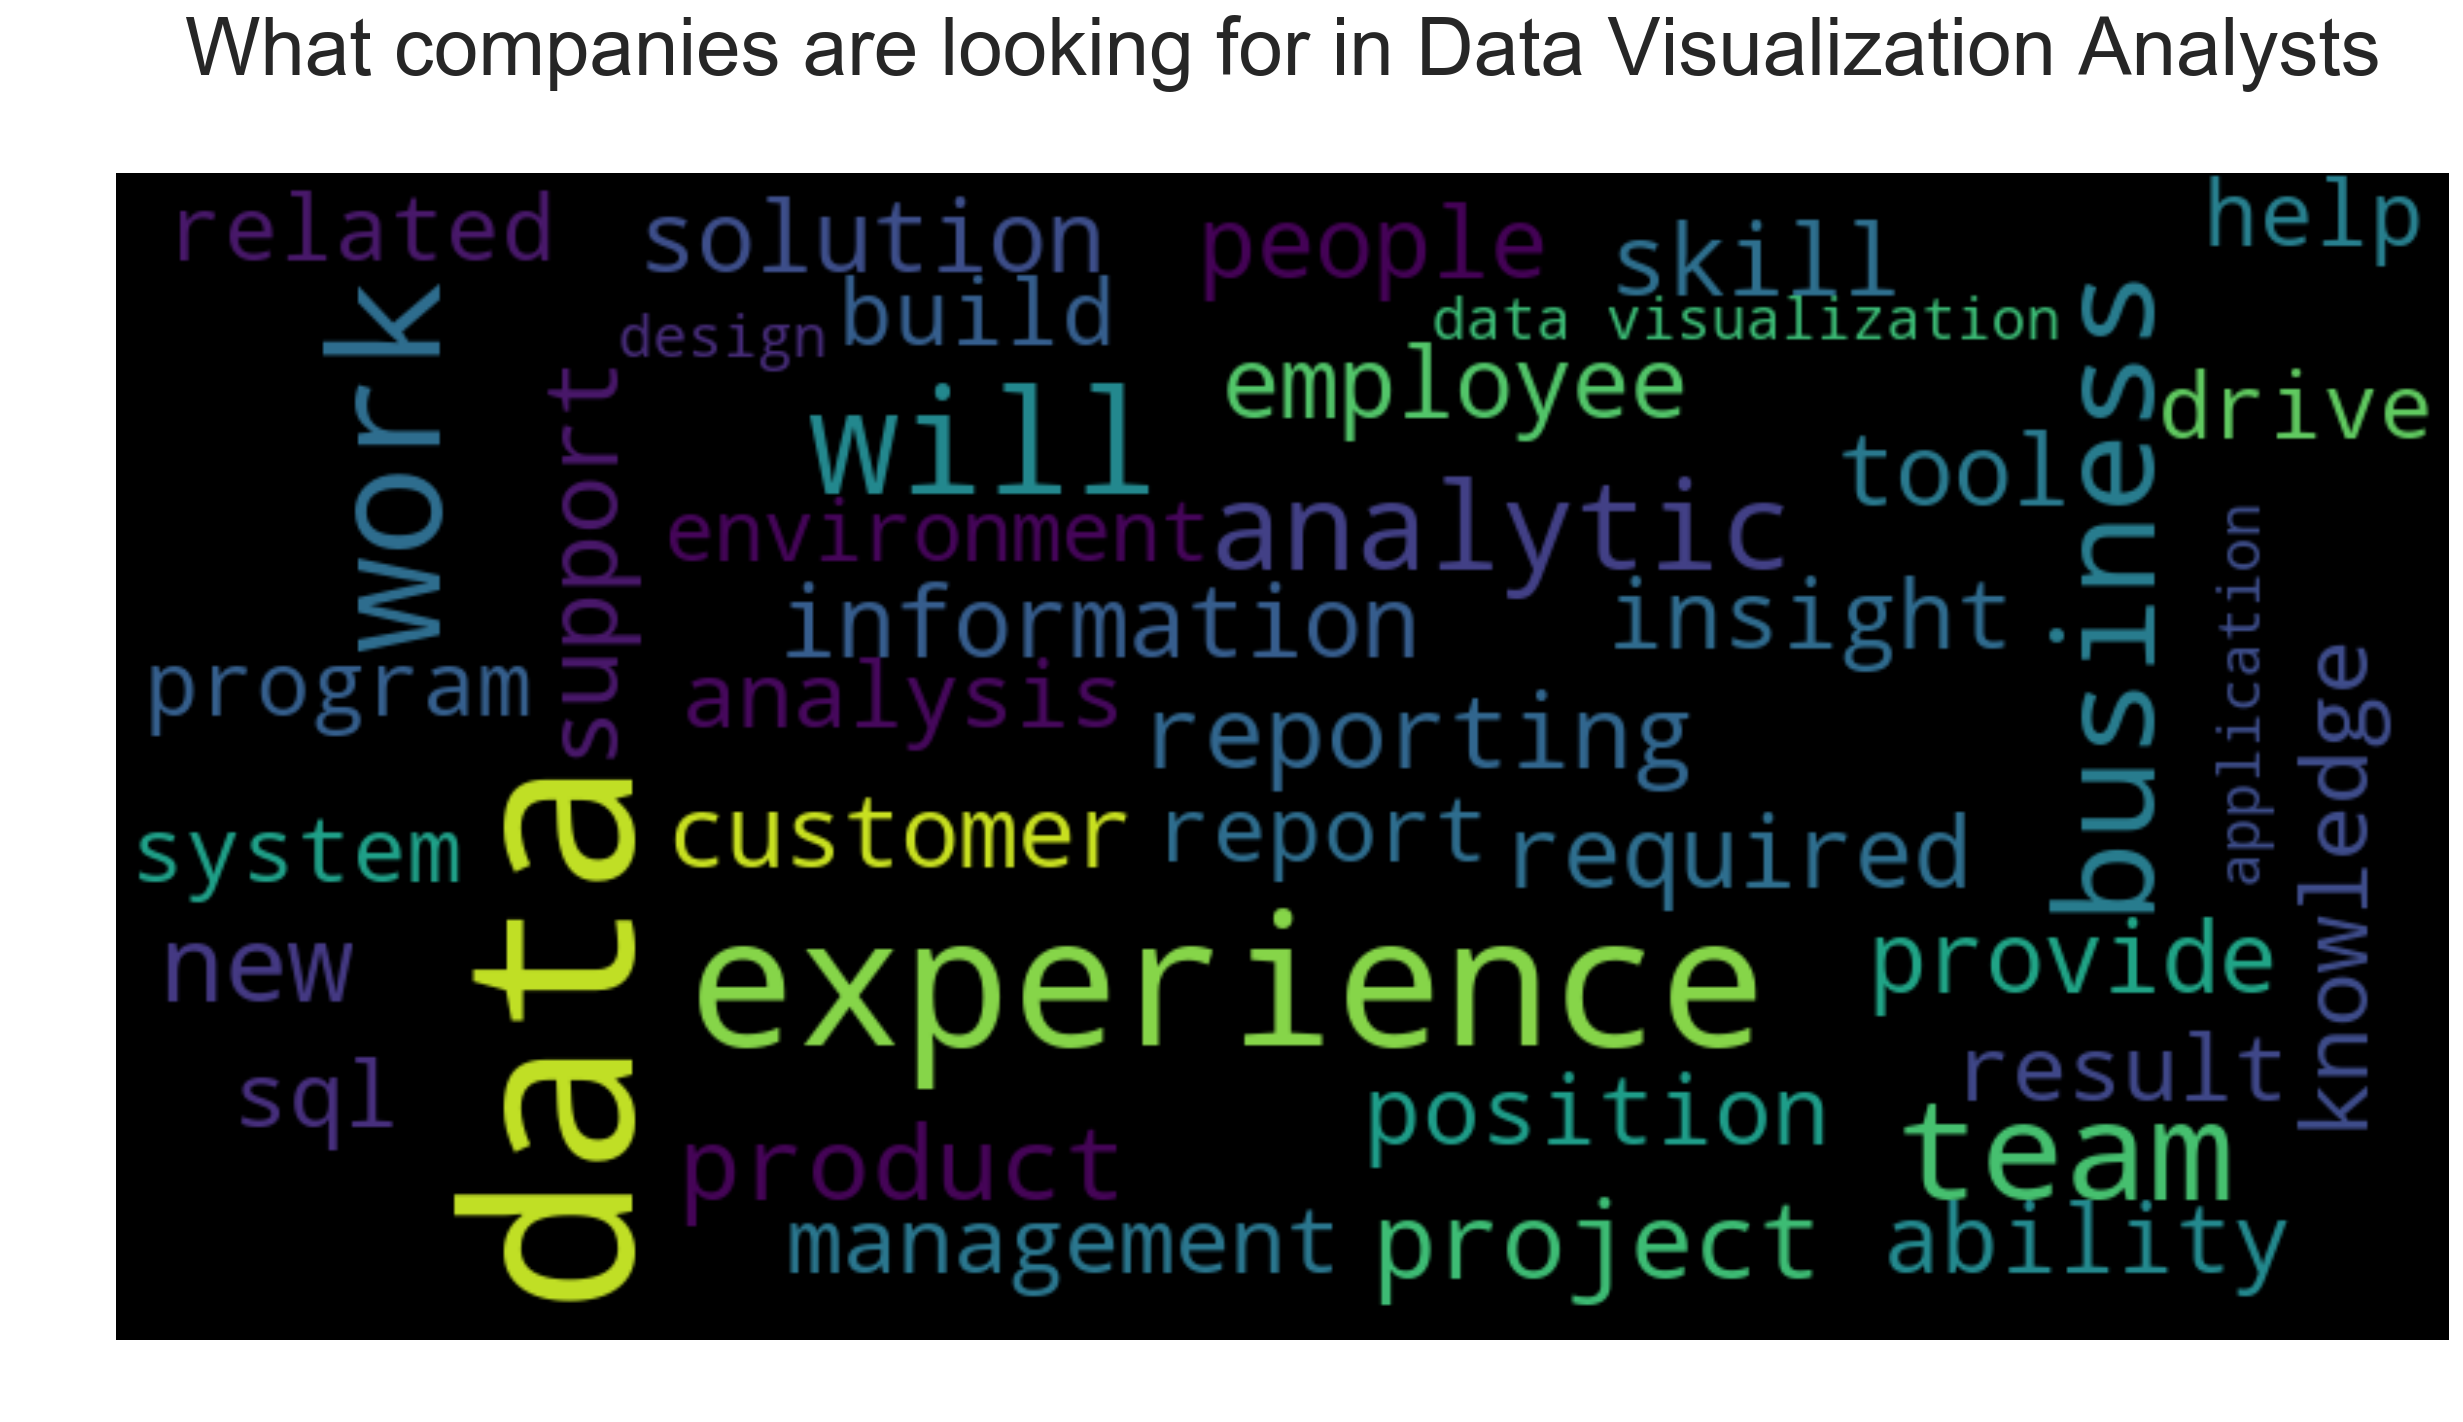

In [48]:
word_cloud = WordCloud(max_font_size=80, max_words=40,width=800,height=400).generate(' '.join(dv_words))
# set parameters
_=plt.figure( figsize=(20,10) )
_=plt.imshow(word_cloud, interpolation='bilinear')
_=plt.axis("off")
_=plt.title('What companies are looking for in Data Visualization Analysts\n', fontdict={'fontsize':40, 'fontweight':400})
%config InlineBackend.figure_format = 'retina'

***
# Data Visualization Specialist

In [49]:
dvs = ['https://www.indeed.com/jobs?q=data+visualization+specialist&l=Austin%2C+TX',
      'https://www.indeed.com/jobs?q=data+visualization+specialist&l=Austin%2C+TX&start=10',
      'https://www.indeed.com/jobs?q=data+visualization+specialist&l=Austin%2C+TX&start=20']

In [50]:
dvs_vacancies = [d for l in [get_all_vacancies(i) for i in da_all_jobs_list] for d in l]

In [51]:
%time
# get a list of all the job announcements, get the descriptions and add them to a list
dvs_list = []

for i in dvs_vacancies:
    dvs_list+=read_description(i)
    
# save descriptions
with open('DVSJobPosts.txt', 'wb') as dvs_links:
    pickle.dump(dvs_list, dvs_links)
    

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.72 µs


In [52]:
# open descriptions
with open('./Data-Science-Projects/reading-job-announcements/DVSJobPosts.txt', 'rb') as dvs_links:
    dvs_list = pickle.load(dvs_links)

In [53]:
# get words

dvs_words = get_words(dvs_list)

# find the skills in the announcement
skills_dvs = [x for x in dvs_words if x in SKILLS]

skills_dvs_jobs=pd.Series(Counter(skills_dvs)).sort_values(
    ascending = False).reset_index().rename(
    index=str,columns={"index": "skill", 0: "counts"})

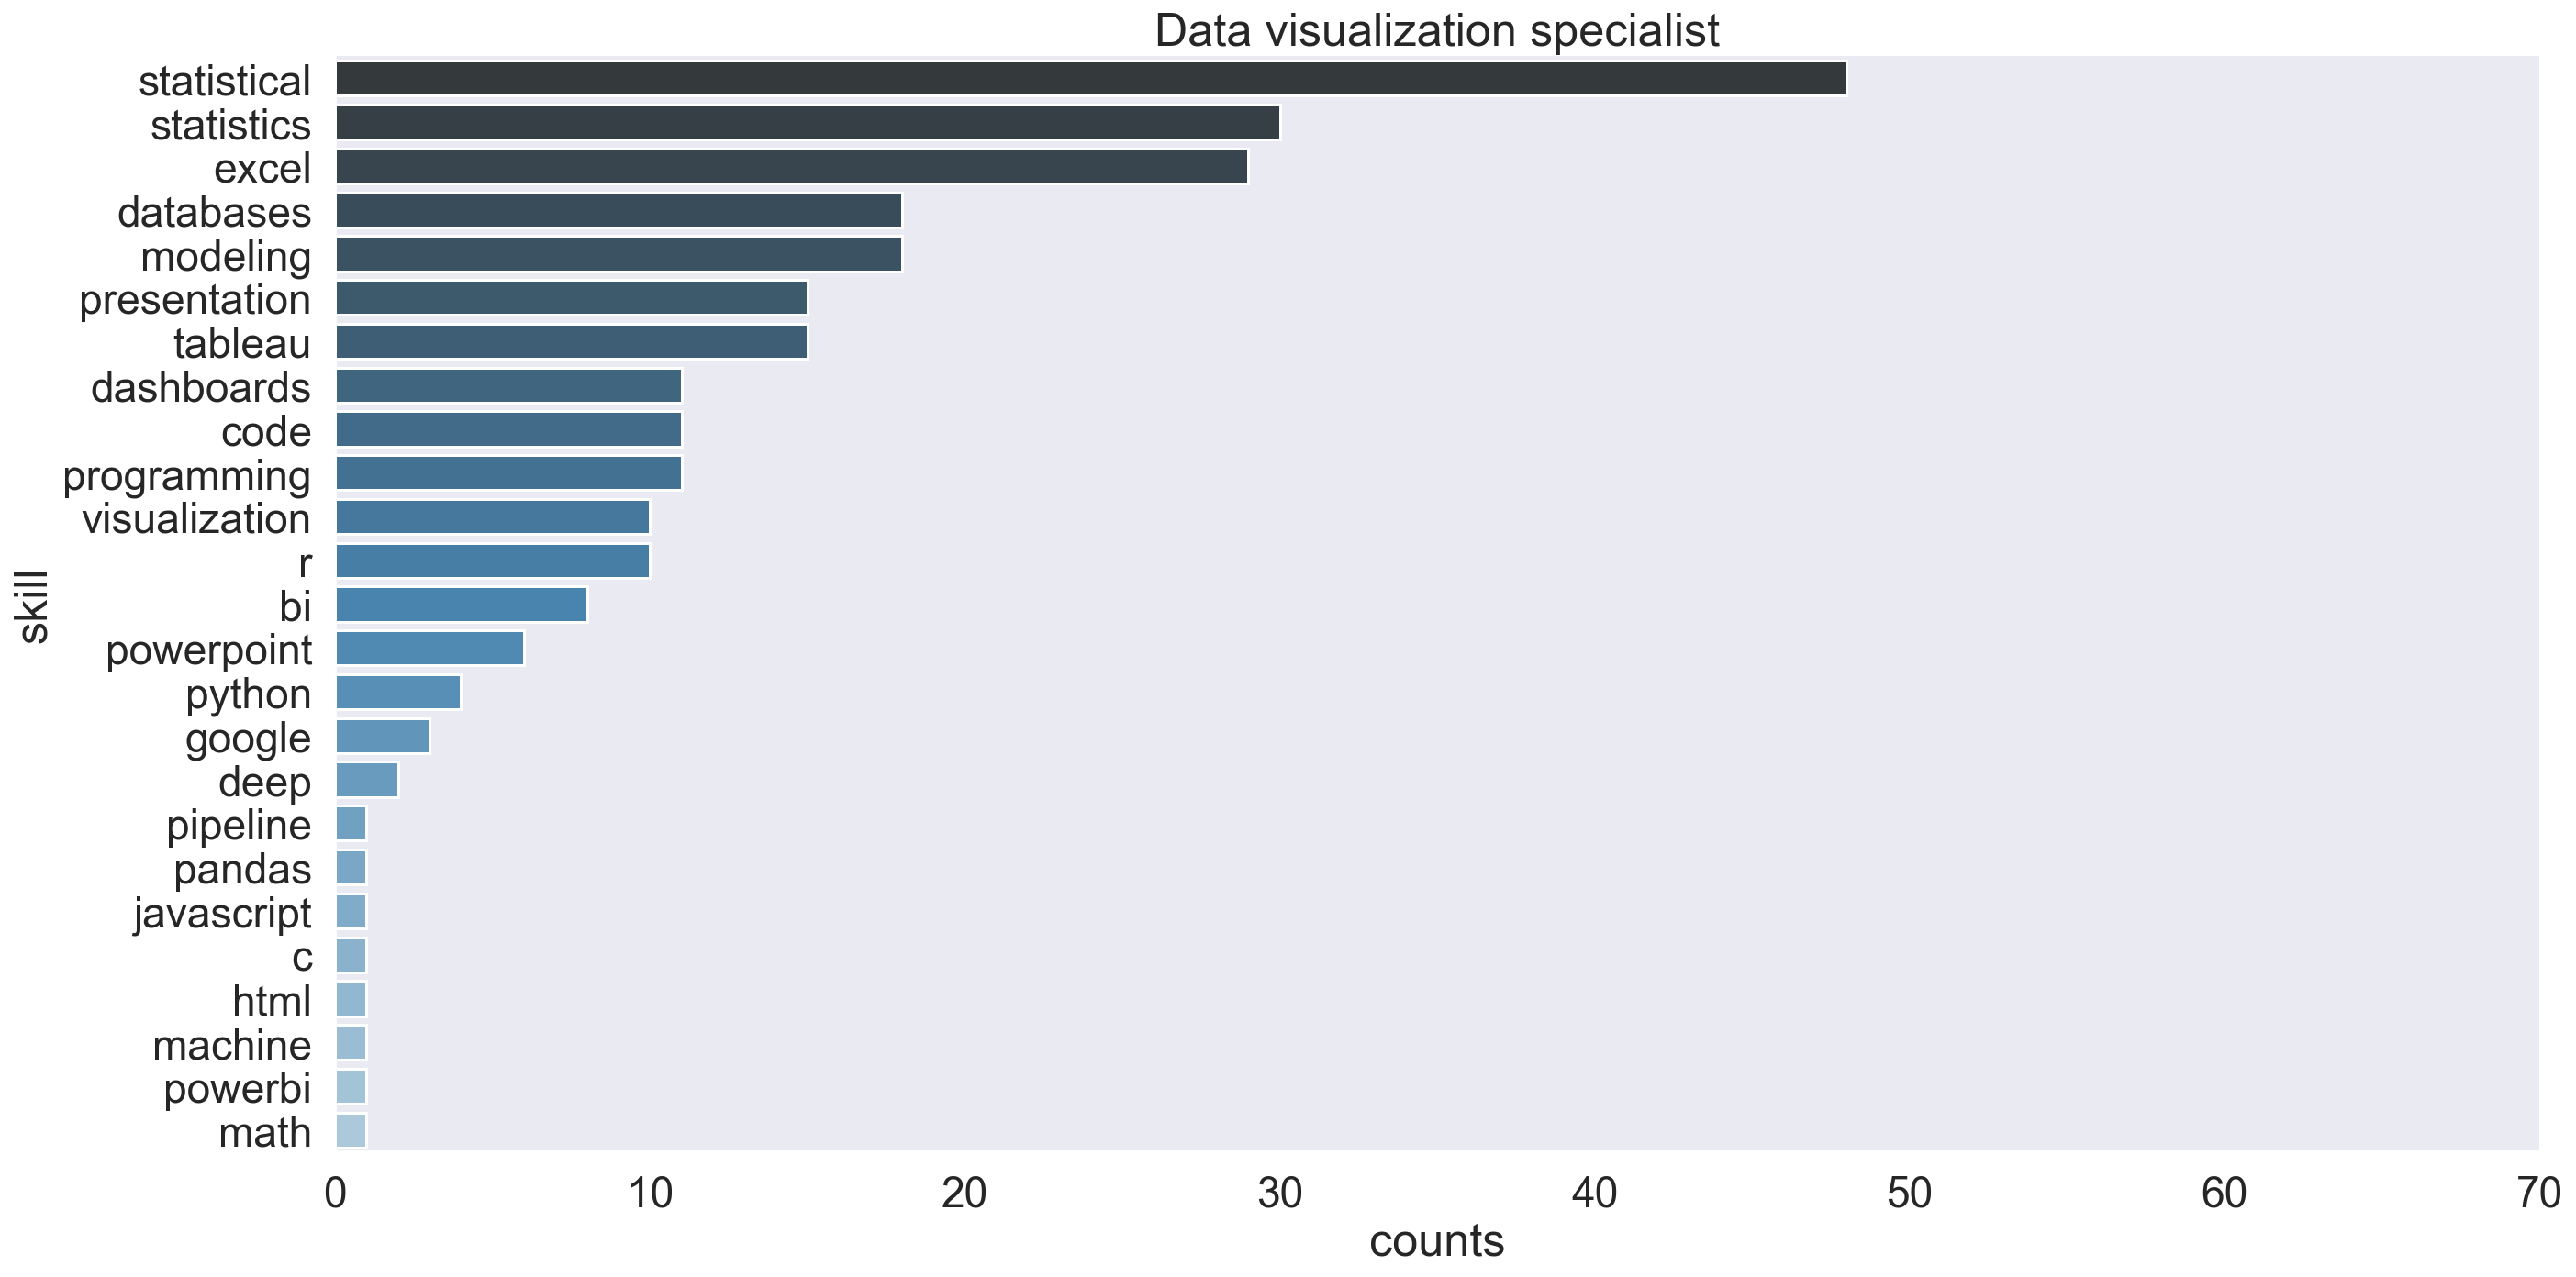

In [54]:
_=sns.catplot( x = 'counts', y='skill', data = skills_dvs_jobs, kind = 'bar',
             height= 10, aspect=2, palette='Blues_d', dodge = False)
_=plt.xlim(0,70)
_=plt.title('Data visualization specialist')

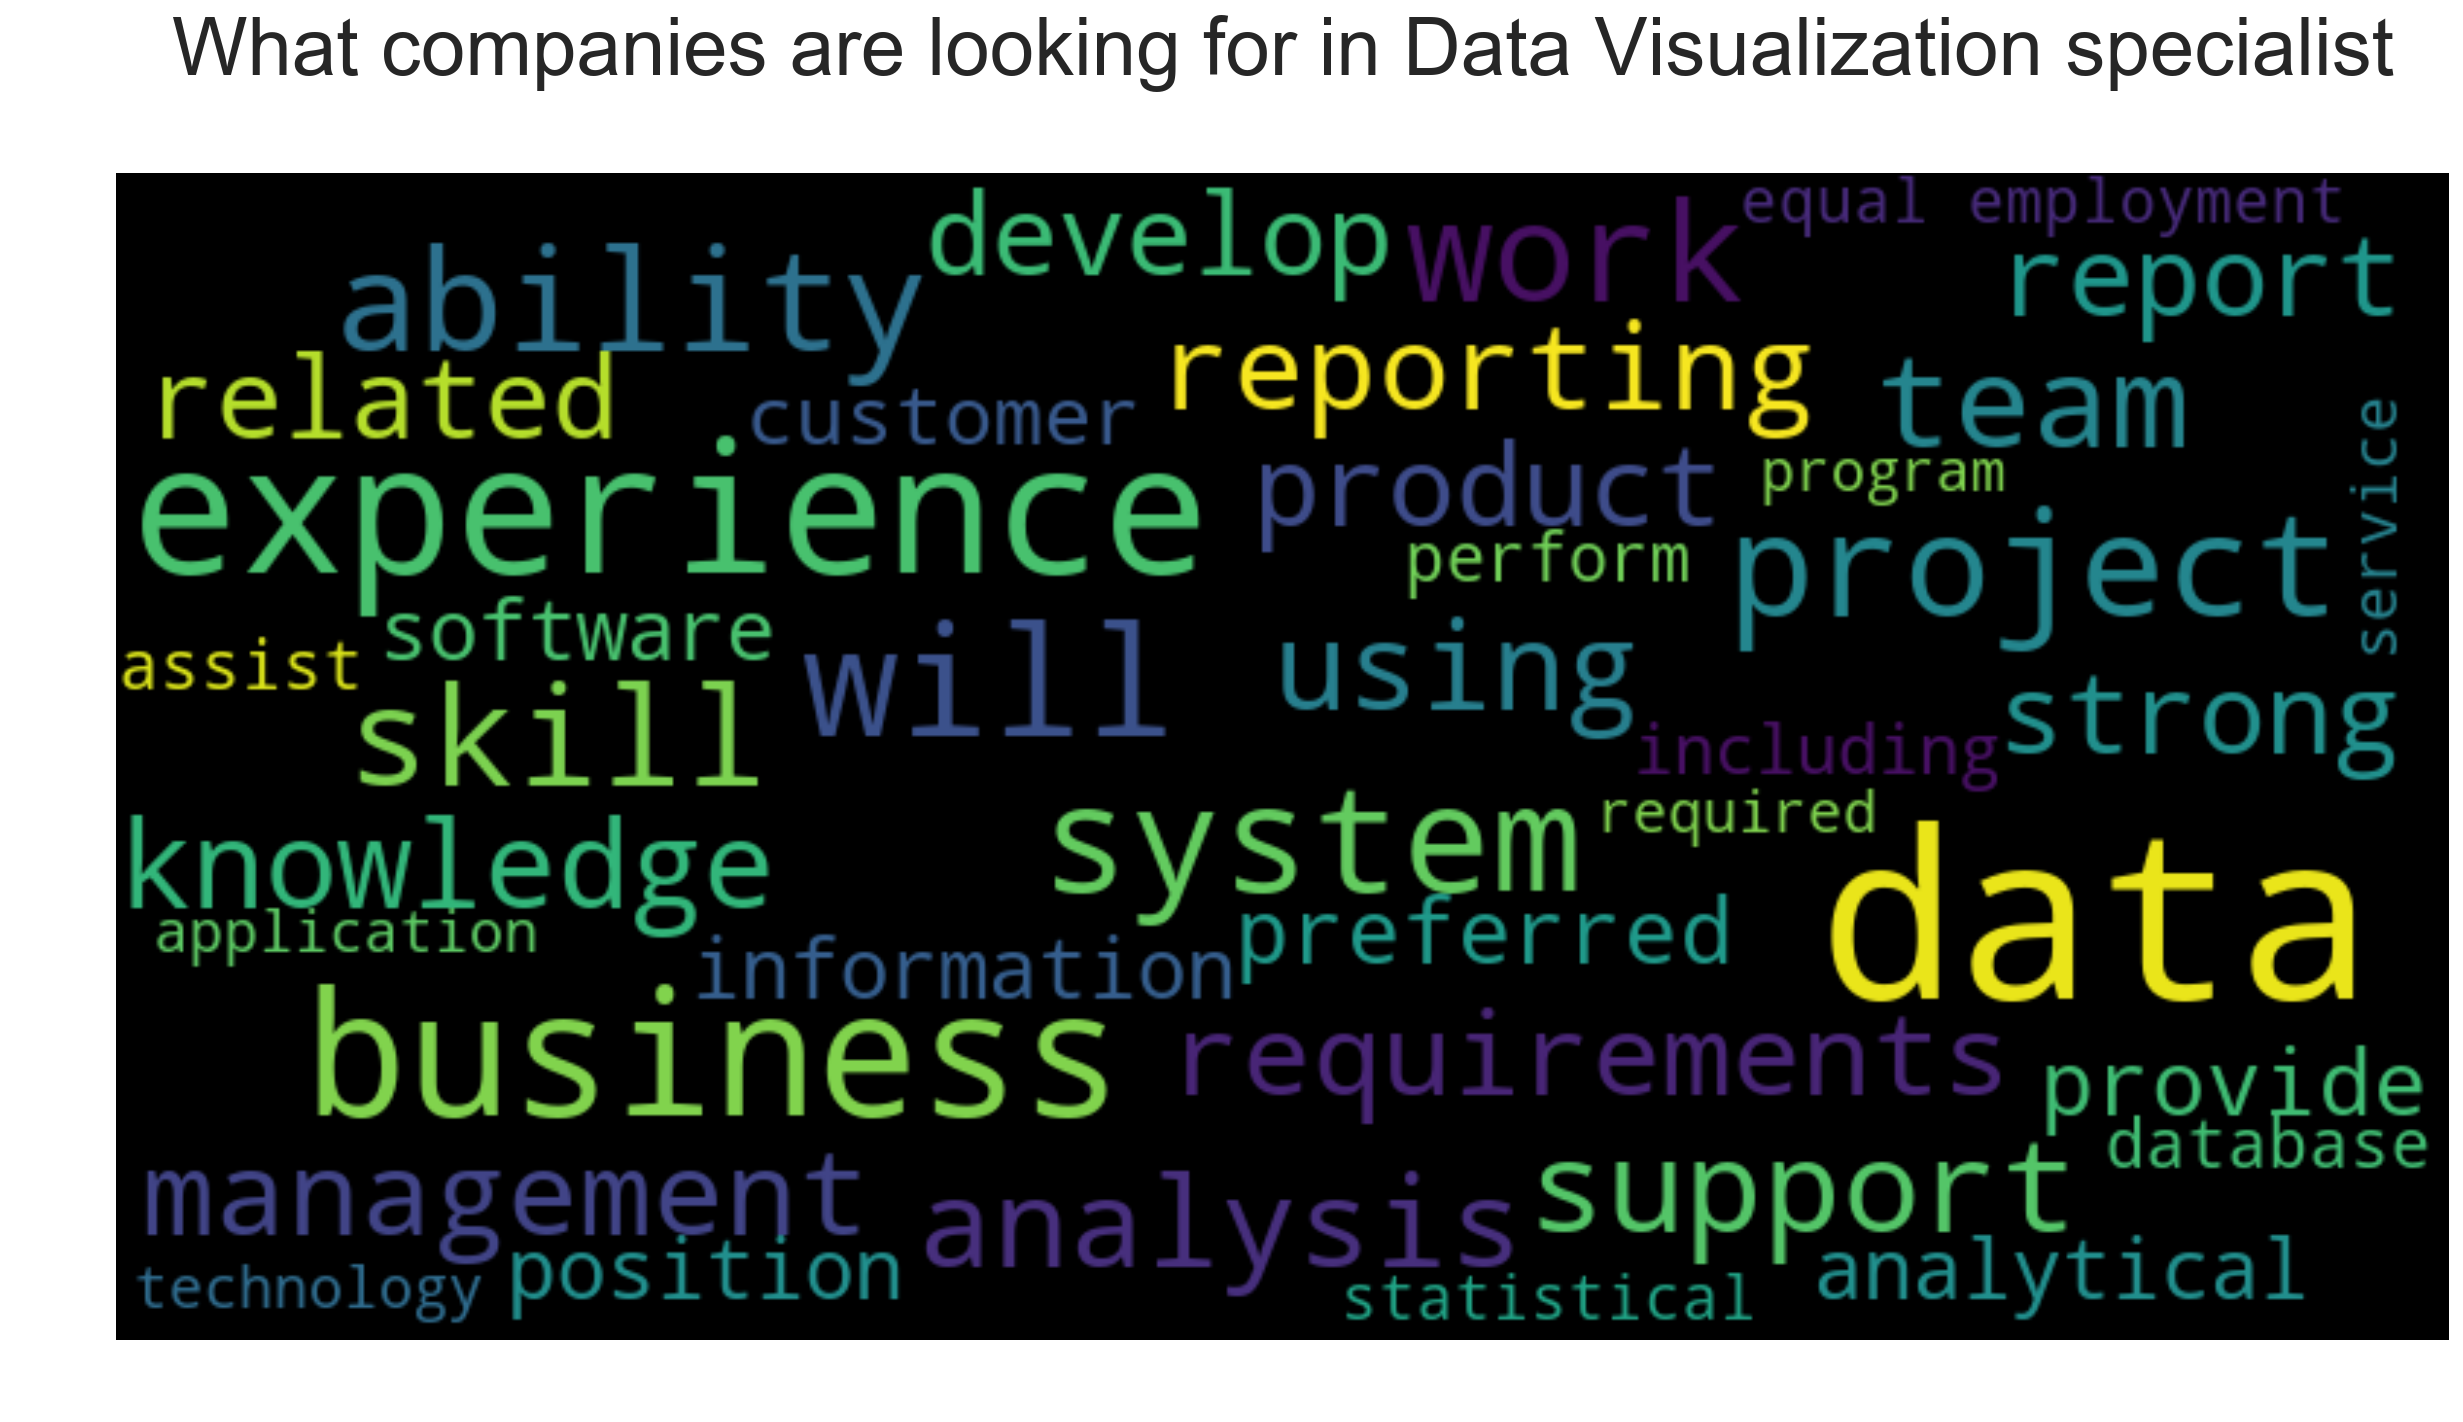

In [55]:
word_cloud = WordCloud(max_font_size=80, max_words=40,width=800,height=400).generate(' '.join(dvs_words))
# set parameters
_=plt.figure( figsize=(20,10) )
_=plt.imshow(word_cloud, interpolation='bilinear')
_=plt.axis("off")
_=plt.title('What companies are looking for in Data Visualization specialist\n', fontdict={'fontsize':40, 'fontweight':400})
%config InlineBackend.figure_format = 'retina'


# Conclusions

<p>Data scientists and data analysts are in high demand and although there are many skills and attributes that overlap, their tools and objectives vary. Companies hiring data analysts are looking for someone who can effectively use their data and translate them into actionable business insights using mainly out-of-the box tools such as Excel, Tableau, and PowerBI.</p>

<p>Companies hiring data scientists are looking for someone who can gather, integrate, and analyze current and new data, with strong statistical background to choose the right algorithm to model the data and develop ways to improve business practices. Although tools like Tableau are mentioned in some of the job announcements, strong statistical and coding skills, primarily in Python, are a must.</p>
